In [1]:
!pip install pytorch-nlp

In [3]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
# from torchnlp.datasets import imdb_dataset      # --> We are using our own uploaded dataset.
from pytorch_pretrained_bert import BertTokenizer
from keras_preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
import jieba.analyse

In [4]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)

In [5]:
cnx = sqlite3.connect('../Scraping/Data/labelTitle.db')
df = pd.read_sql_query("SELECT * FROM labelTitle", cnx)

length = df.shape[0]
tenthLength = length//10

popRank = df.sort_values('poprank',ascending=True)
titles = []
labels = []

for x in range(length):
    titles.append(popRank['title'][x])
    if x <= tenthLength:
        labels.append('1')
    elif x > tenthLength and x <= 2*tenthLength:
        labels.append('2')
    elif x > 2*tenthLength and x <= 3*tenthLength:
        labels.append('3')
    elif x > 3*tenthLength and x <= 4*tenthLength:
        labels.append('4')
    elif x > 4*tenthLength and x <= 5*tenthLength:
        labels.append('5')
    elif x > 5*tenthLength and x <= 6*tenthLength:
        labels.append('6')
    elif x > 6*tenthLength and x <= 7*tenthLength:
        labels.append('7')
    elif x > 7*tenthLength and x <= 8*tenthLength:
        labels.append('8')
    elif x > 8*tenthLength and x <= 9*tenthLength:
        labels.append('9')
    elif x > 9*tenthLength:
        labels.append('10')
for x in range(length):
        print(titles[x], labels[x])

放不下確診離世的家人 1
穿這樣被罵很騷 1
我家人說我在賣肉 1
跟差點被騙去柬埔寨的朋友絕交了 1
可以不要抹黑Bump了嗎 1
怎麼讓我妹相信她真的有超能力 1
我真的很想一棍子打醒我姐 1
！！乾！鞋子倒出一隻蟾蜍 1
鼻子毀了我的臉 1
我鄰居的大哥曾經被緬甸的人蛇集團綁架 1
我的媽媽不承認我是他的孩子 1
機車駕照怎麼考都考不過 1
柬埔寨外流影片看了好不適 1
看見小朋友在公共廁所洗內褲 1
長相比較符合上個時代的審美 1
我是逆媳又怎樣？ 1
柬埔寨無碼血腥影片 1
爸偏心 1
柬埔寨爆料 1
我很想祝福她考上 但我做不到 1
何等渺小卻能被行政院長幫助.... 1
基督徒的我居然為了五萬抄心經 1
爸爸的女友臉皮有夠厚… 1
雖然考過駕照但 1
好想懷孕 1
小時候被學長猥褻 1
要上大學了 要搬宿舍了 好緊張 1
台灣一大堆正妹 1
在另一個世界當位快樂的天使吧🌈艾成……R.I.P…… 1
男人間的幹話⋯嗎？ 1
處女沒怎樣 他媽說謊才是最大的問題好嗎 1
月薪38K 住外面 孝親費一般給多少？ 1
我有一個會家暴的哥哥 1
請大家真的要慎選朋友！！ 1
因為疫苗頭髮掉光 1
林中之光 1
按摩舒壓 1
淺談+9都把得到正妹 1
我表姐喜歡她堂弟 1
今天我生日 1
學開車跟騎機車關係很大嗎？ 1
分手後的成長 1
沒被好好對待過的小孩，該怎麼愛人 1
第一次見面直接上車？ 1
側臉很醜。 1
該怎麼治療恐男 1
曾沛慈《今天陽光就是特別特別耀眼特別和諧》超好聽 1
外籍生被逼著回家 不知能怎麼辦 1
大家還有跟大學以前的朋友聯絡嗎？ 1
深夜看了這篇文，突然讓我想起我的媽媽 1
讓人窒息的家庭 1
台妹猴子行徑 1
艾成好可憐啊！ 1
一個人看演唱會會不會很怪 1
每個月給孝親費的壓力 1
高中學妹自殺 1
旋轉拍賣詐騙/無法下單 1
8/16搭自強117到台南，不小心睡在一位男生的肩膀上，真的是很不好意思，本來想要好好跟他說聲抱歉，但同時在台南站下車，雨下得超級大，後來一眨眼人就不見蹤影了，只想要說聲謝謝你。 1
朋友拉屎拉到一半 1
拔個智齒差點毀容，該求償嗎？ 1
1925的接線生問我「想不想自殺」？ 1
不敢唱歌（有音檔 1
好想確診憂鬱症 1
老闆詐騙😡 1
霸凌的人到底是什麼心態 1
生日快樂 1
關於婆婆 我壓力很大 1
生活累

在KTV花了快800元唱一首歌 1
真珠美人魚展覽及用餐心得 1
長大後覺得當女生真好 1
媽的幹 1
想分居卻發現懷了第二個孩子 1
給為了活著而不斷掙扎的你 1
爸爸的付出 讓我承擔不起 1
我姐在柬埔寨三個月了（失聯狀態 1
考研也可以變瘦🥳 87kg ➩ 57kg減肥心得分享 1
你們會洗澡時邊尿尿嗎 1
#幫高調 台中幼稚園案件的熱度！ 1
98歲阿嬤阻止我跳樓 1
包養實錄-二手車商妹 1
大學畢業，我有了自殺的念頭 1
終於我也如願熬到買房擁有屬於自己的家! 1
茅塞頓開終於找到人生方向！！21歲休學待業能做什麼？ 1
臉書壞了？ 1
祝你生日快樂 1
活著到底是為了什麼 1
（文長）該怎麼看待越來越可怕的妹妹 1
男友約砲過，現在要遠距離了，我真的很擔心⋯ 1
爸媽不會照顧自己問題一大堆 1
ADD/ADHD不是遲緩兒 不需要無謂的可憐與同情 1
這算電話禮儀嗎？ 1
對弟弟的行為很頭痛#文長 1
第一次遇到這麼盧又沒禮貌的人 1
想求認識這位陽明大學的男生 1
穿愛迪達被說低學歷？ 1
想問是不是有人跟我一樣大學了還沒談過戀愛😭 1
和男友同居的支出怎麼算？ 1
第一次當ATC全方位人才培訓營課程 主持人\n😱🥹😊😄 1
爲什麼男人不想養小孩卻想生小孩🤔 1
世界最帥的男人 BTS金南俊👑 1
為什麼被大家討厭 1
幫高調！弟弟的坎坷交友 1
駕訓班被放生 1
體脂低+大奶 1
被喜歡的人拒絕了 1
洋蔥味道太重了⋯😵‍💫 1
萬般皆下品，唯有金錢高 1
比較 1
被人夫包養 1
我好像得憂鬱症了 1
文組畢業對於未來看不到希望 1
最近斷捨離了一位愛炫耀約砲的朋友 1
勸世文-情侶千千萬萬不要一起買房 1
鞋子為什麼可以放在走廊？ 1
為什麼沒有知心朋友 1
婊子的定義到底是什麼 1
善良的人是沒了還是保持沈默？ 1
這是被偷拍嗎 1
有人知道ig這樣怎麼辦嗎 1
傻人有傻福 1
父母都是這樣的吧 1
跟室友個性不合 發現他們另建群組 1
突然的焦慮 1
太容易暈了 1
推掉了朋友邀約 1
交友軟體換照片後 1
在淡水信義線遇到的妳 1
再也不會跟情侶出去了 1
學生時期沒談過戀愛的人，會後悔嗎？ 1
有沒有人在虎科掉手機呢？ 1
我因為重度憂鬱症跟思覺失調（精神分裂）沒工作快三年了 1
在Tinder遇到詐騙，但他說不想騙我 1
太在意他人的想

我20歲還是不會騎機車⋯⋯ 1
請老婆幫忙賺錢分擔，錯了嗎.. 1
渣男前男友居然跑去柬埔寨詐騙回台被抓 1
你各位叫我嫁有錢男生 我垂手可得但不屑 1
半夜不小心打電話給主管怎麼辦 1
睜開眼看到你的微笑，那一天就是好天氣 1
男店員說對我有印象…（微長） 1
父親是自卑人格對我影響很大 1
被啃老妹妹說 你賺的比我男友少憑什麼管我 1
我的條件感覺很差🥲 1
超商收到爸媽的慰問品 豪感動~ 1
郵局最近一直寄這個簡訊，是不是有人嘗試刷我的卡？ 1
IG上搭訕人的人 1
心裡很矛盾🥺 1
新聞／北市南港爆凶殺案 男當街持開山刀砍女急送醫（有影片慎入） 1
包養該注意的經驗談 1
每一天都在跟死神拔河 1
您最後的溫柔 1
為什麼要活著？ 1
25歲還是處，覺得超自卑 1
台灣人的服務都好棒 1
發現男友推特奇怪的追蹤名單 1
口罩戴到煩死 1
被一群女生莫名鎖臉書 1
S2O 100萬島主包心得 1
阿公阿嬤的恩愛日常 1
耳洞好貴… 1
中秋禮盒分享 1
第一次見面最後一次聊天 1
男友堅持要送女性朋友回家 1
家人總逼我吃海鮮或不喜歡吃的 1
國母：歐陽妮妮 1
真的傻眼爆 1
個性互補的情侶 1
我爸是智障 1
跟處女座在一起 餘生都會慣著你 1
是不是該選擇一輩子單身 1
疫情下的詐騙 1
大家負面情緒爆炸的時候都怎麼辦 1
以什麼心態看世界，心情就會是如何。 1
我的好姐姐 1
有種詐騙叫做我們在做電商! 1
我真的很戀家 求解 1
現在的高中生都這樣？續 1
我阿公家被迫拆除，還要被消費 1
當年我檢舉食安，申請搜索票卡關，我對法官很失望 1
憂鬱症真的是想太多嗎 1
面交拜託一定要收訂金！！！ 1
詐騙集團被我騙，我愧疚了 1
我的人生好像完了 1
我不想走心，但好難 1
師大數學哥何罪之有？ 1
歐陽妮妮防身術 1
突然覺得一個人很孤單 1
工作前焦慮症 1
希望大家評論我的長相？ 1
好奇問一下，這樣的女生多嗎？ 1
室友老是很久回訊息 1
看到一則很暖的留言 1
關於改名過後… 1
有人也不喜歡聊天嗎？ 1
虎寶群被解散🐯 類懶人包 1
虐心（文長慎入） 1
可以跟我說加油嗎？ 1
離婚分居後的第一天 心情鬱悶 1
太常私訊網美！ 1
剛遇到魔鬼級奧客身心受創 1
社會新鮮人對開學的心情💧 1
藍色背心這樣搭會怪嗎？ 1
原po說的是真的… 1

十年前的感情 1
大家好，你們注意身體健康嗎？ 我今年26歲，一直擔心自己的健康 1
社交好難 1
不知道是陰性還是陽性 1
有人討厭加班嗎？ 1
好大的颱風要來了 #電力滿格的密技 1
後天就是我的生日，但我想離開了 1
我不知道這是不是自己想要的未來 1
我的膀胱罷工了…… 1
假如隔壁床患者家屬情緒不受控該怎麼辦？在線等 #急 1
對不起 1
極樂大學生活 1
CMB配對率 1
才剛跟空軍男分手不久 1
22歲 被男友長輩催婚 1
前男友執意要來參加我的婚禮 1
明新課程 1
歐陽妮妮不是第三者 1
冷氣搖控器的隨身感是做什麼的 1
為什麼我總是一個人 1
我家兒子最寶貴 1
被要求檢視自己的態度 1
討厭自己害怕被室友討厭 1
車資比飯錢還貴 1
這麼貼心該暈嗎 1
動茲卷被盜刷 1
沒有夢的人生？ 1
不想離開家裡 1
動態發玩樂照=分組不做事？（文長） 1
4年了 祢們終於走到我的夢裡 1
他恐怕不會被退學 1
關於友誼那件事 1
google帳號被登入過 但太晚發現 1
終於離職了 1
被砸電腦 1
活著好累-關於我的人生自傳 1
覺得我媽好噁心 1
輸 1
此篇為感謝文，謝謝Dcard和可愛的大家（文長） 1
與你無關 1
易暈體質怎麼辦⋯⋯ 1
我也想要 1
得知我結婚了 前男友的訊息 1
家產上億但沒真愛 1
讓男友心跳加速的方法 1
性事就不合？到底想怎樣？更 1
男生嫌棄女生太早發生過性行為 1
前任突然打電話給我說.. 1
是我太沒安全感嗎 1
糟了我不小心暈船 1
越成功的女人越不想生小孩 1
更（西斯）男友不幫前戲每次都說手破皮 1
我男友說我只愛他的身體 1
男友去外島當兵 結果是自己被兵變 1
曖昧對象一直傳emoji 1
速食愛情下的性行為 1
交往的目的不是因為喜歡 1
曖昧對象到底有沒有戲 1
大家都怎麼跟另一半在一起的呢 1
女友跟老媽生日撞期怎麼辦 1
我超愛送另一半禮物 1
直男/母胎單必看！有關約會安排 1
被包養想跟乾爹要更多 1
關於男友是頂大醫，而我只是個私校 1
穩聊對象突然變得很冷淡 1
男生真的都會這樣嗎…？ 1
8+9男友的生日禮物 1
愛情裡的承諾 1
許多理工男只能魯一輩子的真正原因 1
有女生跟我一樣在意男友很好的女性朋友嗎？ 1
女人的反差 過於真實 1
好像永遠專情不回去了⋯ 1
小三發文說好怕

我的卡通人生 Part V (最終篇) 1
台灣的法官不要再恐龍下去了 1
你在朋友心中的地位已被取代 1
台灣警察很噁心 1
新生訓練 結果丟了4萬元 1
家人會沒經我同意亂動用我的東西 1
朋友被綠了 1
活著好累 1
心情 1
北市松山驚爆隨機性侵　夜歸女遭20多歲男當街壓地淫辱 1
變得有點憤世嫉俗 1
撒了一點謊 1
活著好累 1
殺手網站 1
練笑真的有用嗎？ 1
或許 1
法律問題 1
被嗆胖啊可能我就玻璃心吧 1
薪水小偷 1
矛盾心態的自己 1
真的想放棄人生了 好想找包養 怎麼辦 1
現在女生思想都這麼開放嗎 1
過時的流行用語 1
奇怪的mail 1
聽音樂被當成偷拍犯==  （純發洩） 1
父母要看薪資單 1
怕看了精神科會影響當兵 1
活著好累 1
才發現我的朋友真的很敏感 1
對不起父母的栽培，我累了 1
幫忙引薦工作是應該的？ 1
科技輪班VS警察輪班 1
男生請進 1
沒有想做的事情 1
莫名其妙 1
吳克群好帥哦！ 1
新的一天～ 1
怕貓咪被丟出去 1
該怎麼做才能讓我弟變得更好 1
好哦～有夠搞笑 1
刺了一個好美的刺青 1
有咪有想聊聊天的一起來這鴨🙋🏼‍♀️🥹🥹 1
該怎麼跟家人坦白有心理疾病 1
生活充滿著什麼才好呢 1
發現紅茶加牛奶很好喝 1
女森請進 1
可以求求有人可以幫幫我嗎 1
交朋友的有趣 1
家裡一直要錢繳保費 1
我快撐不住了 1
第一次遇到這樣的人 1
又撐過了一天 1
求助！！lucy's項鍊的價位🫠 1
「我愛你」 1
陳時中也太活潑了吧！！😂 1
冰箱面板凹陷怎麼辦🥲 1
該怎麼辦呢 1
統聯客運自由選坐 1
#344-340 1
很久沒見也不會想見 1
憂鬱症卻被網路暴力的她走了 1
跟你斷交是最棒的決定 1
Ig貼文沒有生活照，會有人想追蹤嗎？ 1
約砲暈船暈好暈滿-附圖 1
如何讓自己活潑外向會聊天 1
fat 1
出國留學的心情 1
才剛開學就想休學了 1
管好你們家的移動式神主牌 1
自己不尷尬，尷尬的就是別人 1
男友說要上廁所 但房間喇叭傳來… 1
我遇上渣男，花6000療傷 1
對各種交友軟體的第一印象 1
發現曖昧對象在ig個人簡介標註我，該請他刪掉嗎 1
一交往就講這些話會很奇怪嗎？ 1
我親手結束了一段友誼 1
早上做壞壞的事 1
同居男女 有點膩了 1
我知道偷看男友手機不

可愛教主My Ass 1
蝦皮上賣毒品？ 1
來了，「類」瀏海iPhone 14 1
誰要喝苦味熱水果湯呀~也沒雞肉 1
台灣走在路上還要戴口罩嗎 1
笑死!綠共大頭目說自己是中國人 1
一個人的中秋節儀式感還是不能少吧！ 1
iPhone 14全系列機型流出？蝦皮商家搶先知道！ 1
環島來小琉球避難ㄉ男生！ 1
桌布電池小插圖 1
麥當勞蕃茄醬改成韓製了！？ 1
想包養高品質女生卻找不到 1
年輕人 YT已成文字獄 1
避孕啊... 1
路上發…？ 1
！想問大家心目中推薦的電影 1
在此呼籲 平權興起 1
迪奧貝殼鞋有人買過嗎？ 1
分享違法行業的心得？？ 1
晚上睡覺都會憋尿 1
三人以上坐Uber前座 1
我家的人絕對都會猝死 1
扯爆！PTT鄉民發文「超過500人排隊」，事實查核中心卻查「500多例確診」 1
換了兩副鏡片……是不是要再換？ 1
逢甲小偷 1
藝人跪舔中國是大勢所趨 1
隨意分享 全家×再睡五分鐘棉被拿鐵：清早就可以喝到厚厚奶蓋山！？ 1
北部人比較愛吃連鎖店？ 1
你的中午跟我一樣是中午嗎？ 1
中秋禮盒分享和討論 1
叫外送遇過最扯的事 1
陳亞蘭入圍金鐘男主角 1
好像韓星喔 感覺是正妹 1
........台大只在乎利益，沒有愛....... 1
#詢問 可以簡單上手的樂器 1
買了監聽耳機 1
搭訕妹子急著走，我該糾纏嗎？ 1
好想賺錢～～～ 1
好奇大家覺得 這樣算不算抄襲 1
後續 1
西柏林的迷思 1
奧客邏輯真的不可有 1
學生證真的是很好用的東西QQ 1
詢問身型與基本穿搭？ 1
關於包養 我遇到的壞人與好人 1
根本原因在民進黨黨內民調崩盤了 1
(發問)除濕機會不會吸那個 1
業餘務農 1
想求救懂法律或者是警察的各位 1
遠傳網路還好嗎 1
腳好痛… 1
我實在很不想像小粉紅一樣玻璃心 1
求問濾鏡 1
有人不知道大阪府立大學是時事板著名網軍帳號嗎？ 1
幾點開播 1
因為搭車問題生氣是否太小氣？ 1
強制戴口罩到底要到什麼時候？ 1
淺談網軍 1
全民健保快易通 1
相較起來我大綠共算仁慈了吧（？！ 1
這樣是不是沒宿舍 1
有人有遇過這種事情嗎 1
小偷偷起來 1
我被陳時中封鎖了 1
德國之聲專訪朱立倫 1
裝動態心電圖，需要說病名嗎？ 1
小朋友禮物靈感 1
醜 1
跟著網紅實況主參加女鬼橋開魂路慶功宴線下

人生最低潮的一個月卻成了人生最大轉機 2
朋友說我很可悲 2
到底是誰會錯意？ 2
要退群嗎？ 2
是在趕火車嗎^_^？ 2
不是女生，就要有母愛 2
一個普通人在大考前的各種焦慮 2
介紹朋友互相認識，結果反而自己落單 2
時時刻刻提醒自己⏰ 2
遊樂園工讀看盡百態人生 2
跟父母有過不去的心結 2
🥱男生30歲沒有汽車..不用脫單了？ 2
學貸資格不符合 2
AA制？女權自助餐？？？ 2
飲料店打工 2
自殺是救贖 2
這樣子的朋友該繼續嗎 2
交男友@@ 2
中秋三天快瘋了🥲 2
會為了朋友而被扣薪水嗎？ 2
開學前一天晚上我想家想到痛哭 2
爸爸退休後找不到生活目標 2
哭啊 2
上課頭都不敢抬 2
其實沒有那麼多朋友是真正關心你的 2
發問#交友軟體的女生主動結束話題 2
令人匪夷所思的公務機關回覆 2
遇到傻眼老闆🙄 2
佛系備孕一路到覺得懷孕好難二 2
是因為內心封閉嗎？ 2
確診是件大事嗎? 2
尋自強號火車南下到屏東的男孩 2
男生包養、喝茶錯了嗎 2
笑死 生在鬼島真的可憐 2
天蠍座教會我的事 2
人類自願滅絕運動 2
火車上的怪人 2
家人一直想把我養的烏龜放生 2
斷聯後應該從共同朋友圈消失嗎？ 2
快三十了 會不會成就焦慮 2
找能夠說話的人…. 2
當男生小帥、當女生龍妹，是否生錯性別？😢 2
視野缺損 青光眼初期 2
被屁孩弟弟暖到 2
第一次吃燒烤居然遇到這種事...（文長請慎入） 2
思春期症候群 2
自強號 2
來自媽媽的情緒勒索 2
因為一個夢跟老公吵架 2
刺青圖 尋人 2
準備跟男友遠距 2
一定要扶養手足嗎🥲 2
要不要換14（請給我點建議🙏） 2
希望你心情好點 2
曾是屈臣氏的員工之告白 2
和男友聊小美人魚真人版聊到不太爽 2
後天要去當兵現在就在緊張 2
我有憂鬱焦慮和成人過動 2
家人想了結自己 2
如何認清自己的能力就是到這 2
分組焦慮症 2
小時候父母讓我很難過的行為 2
茫然 2
#遠距離 男友開刀中 2
難忘的中秋節 2
我被詐騙了 2
一個人 2
我實在對某些人的懦弱和膽小怕事感到火大 2
我家隔音很差 2
國中露營 2
你有這樣的同事會離職嗎？ 2
休病假休到厭世 2
開不起玩笑 2
回家後的想法 2
最近心情很複雜 2
屏大學生證可以騎高雄的腳踏車嗎 2
犀牛盾折扣 2
好想交朋友⋯ 2
到底誰

給女友零用錢 2
會介意另一半的搜尋紀錄嗎？ 2
交往過後，久了真的沒有感覺了？ 2
暫時分開 2
今天分手了 2
復合的意義 2
下班回家很累 另一半做什麼會讓你開心？ 2
分手多久可以交下一任 2
嫖破百次沒事，ㄧ約砲就得菜花 2
女孩們可以接受男生吃壯陽藥嗎 2
男友的母親說「拜託妳放過他」 2
討論什麼制沒意義吧 2
性別正確 2
女生是不是都喜歡被男友強吻 2
砲友暈船了該怎麼辦？ 2
告白前需要的小事 2
0306.3 2
失戀了 2
求復合之路 2
如果你另外一半工作很忙 2
AB制度為什麼讓男生反感 2
沒有第三者的分手真的很痛😢 2
異性間會散發彼此適合的氣息嗎？ 2
想追水瓶座 2
喜歡的男生剛分手，怎麼陪他走出來 2
牽手會抖？第一次牽我的手抖蠻嚴重 2
交往快3年的男友突然跟我說想當朋友 2
真的很想前男友 2
好心有好報 2
小弟也想約炮 2
早上睡醒發現訊息被已讀 2
一直被前任嫌胖 有人喜歡棉花糖女孩嗎 2
如果發現另一半變淡了 2
背叛了兩個人該怎麼辦… 2
另一半一直因為小事情跟我吵架 2
男友不把第一次給我，想分手了 2
要不要下船 2
藍頭教我把妹 2
真的謝謝你 但…… 2
為什麼要貶低自己的另一半 2
不知道對方在想什麼？ 2
女友變了 好累 2
女友跟朋友出去常常都很晚才回家 2
20歲登記結婚 2
男友管太多 2
找男友的第一關條件 2
好的愛情能治癒傷痛 2
RE 2
能接受男友與之前曖昧對象還有聯繫的人有多少？ 2
怎麼樣算男閨蜜？ 2
有人說我這樣是無縫接軌 2
爸爸疑似跟別的漂亮女生不單純 2
夜店 2
關於我在美麗華撿到女朋友這檔事 2
男友嫌棄我變胖 2
練習 2
刻在心底的名字 2
交往經驗豐富vs交往10年以上 2
可以給我一點正能量嗎🥹 2
女生一直找我聊天 2
被大學最要好的朋友退追蹤 2
總是喜歡年紀大的男生是因為缺乏父愛嗎 2
可以接受女友晚上跟學長姐吃宵夜嗎 2
愛玩遊戲的男友 2
現在的弟弟都喜歡姊姊嗎？ 2
遊戲開始、敬請期待！ 2
想找一個失聯的人 2
還沒睡的大家拜託點進來！！ 2
男友最好的朋友討厭我怎麼辦？ 2
評評理 2
拜託大家幫幫我 我看了男友的手機 2
關於我被交往8年的女友甩掉的那些事...（爆幹長文） 2
年紀高錯了嗎？ 2
遇見水瓶男的不解之謎 2
有女友卻不小心喜歡上

Omi這樣算取消訂閱嗎？ 2
發現男友偷拍路上女生 2
要當渣男，就不要怕被抓 2
指交技巧-避免妹妹受傷 2
各位女生覺得另一半多久打一次手槍比較好 2
就這樣我結束第二段的感情 2
男友發福了想分手 2
看到這些感情問題就好羨慕 2
如何促成牽手/擁抱/親吻的發生 2
獨自面對💪 2
怎麼決定要不要走下去 2
不少時候，一昧的付出，他/她並不會愛上你 2
分手前已經不愛了的行為 2
有人遇到過嗎... 2
女友被拉去做直銷，一直跟我要錢 2
交往之後兩個人都超冷靜 2
意外看到女友跟閨蜜的對話 2
小白兔征服大男人 2
不愛了才是真正原因 2
要斷聯把東西還乾淨行嗎 2
最近是不是分手潮啊 2
可能與星座無關 2
分手一段時間 有需求怎辦 2
（文超長，可以當故事看）我最近慢慢的突然愛上一個受過傷的女孩 2
很多朋友的女生難追 2
被冷暴力該怎麼解決 2
男友去按摩店 2
大頭貼也要吵 2
感覺只剩下自己一個人 2
啪，又沒了 2
國中女同學 2
男友不會避嫌 2
到底該不該當炮友？當炮友會做不了情人嗎？ 2
女方再婚，想詢問是否還要給予撫養費？請問有相關經驗的朋友回答嗎？Thx 2
（有西斯）這樣算性事不合嗎？ 2
劈腿可以維繫感情？ 2
沒能開口的話 2
快精神崩潰 2
你們會相信泰國佛牌算命嗎？ 2
已經把性當成日常的人是不是不應該交往 2
遠距離談戀愛，真的可以靠著手機打字來維持感情嗎？ 2
感情版現在是沒人管了是不是 2
勸世-不用花錢買Tinder了 2
有高個女要認識嗎！ 2
#討論 開放式關係、戀愛砲 2
牽手時心很痛 2
每個人的人生必上課題：分手 2
#太扯！騙憂鬱諮商結果是去跟學長約會 2
AA制很過份嗎？ 2
我該繼續等待嗎？ 2
不愛了，還有可能再愛嗎？ 2
好猶豫要不要在一起 2
能接受女友是雙性戀嗎？ 2
外貌協會喜歡上普通女生 2
還在乎嗎？ 2
婚前沒必要，婚後記得補足 2
男友慣性說謊 2
單身狗為什麼越來越多呢？ 2
隨年紀，似乎愈來愈懶談感情 2
遠距離戀愛要怎麼談ಥ_ಥ 2
不喜歡跟男友分開 2
你回來啊 2
一個巴掌的失眠 2
全家人性慾都強 2
果然是分手季 2
碎 2
柴犬 評分 2
文長慎入 2
遠距離卻不視訊的情侶有嗎？ 2
#文長 感謝上帝讓我遇見你 2
謝謝各位網友指教 2
為什麼又想分手了..... 2


社會好險惡 2
英國罷工把大家都嚇壞了！ 2
我的朋友終究還是進去了…. 2
極推嘉義新十全駕訓班 教練唯一指定黃教練 2
周杰倫冷門好聽歌曲 2
新世界聖戰軍 正妹精選 日行一善 Day78 2
關於員警被殺事件 2
姓史可以叫什麼？ 2
快訊／追竊盜通緝遭割頸！台南兩警雙雙宣告不治 2
在夢時代遺失學生證的同學 2
熱情的阿嬤跟不太能吃的孫女 2
不要再佔位了好不 2
辦公室訂飲料被要紅利點數錢 2
媒體才是黑社會最大的幫手 2
一堆政治文🤷‍♀️ 2
準備獨裁化的蔡英文 2
促統言論打臉 2
誰說謀沙警察必定判死刑的? 2
日本醫學界也有許多關於新冠實驗疫苗的被害報告 2
外交部長下台，應該就能滿足了吧？ 2
喜德版網紅之戰 2
當初「反黑箱」的學運份子給我滾出來 2
宜蘭看板大戰 2
成功讓麥當勞起死回生 2
崩潰仔 2
薛丁格的3+11會議紀錄，阿中的多元宇宙比奇異博士精采太多了吧！！ 2
很生氣的話都怎麼發洩 2
請問有人知道她是誰嘛？ 2
台南殺警 2
一刷就斷 2
陳偉捷真的很倒霉🤣🤣 2
〈攝理教〉真．一載二載半載 2
捏爆倉鼠？ 2
Line大頭照 2
表哥離婚後向我道歉 2
在路邊看到包裹 2
 電腦高手請進 2
化妝很重要嗎 2
莫名形成努力的自卑女 2
人心真的看透了 2
如果不是餐廳內用 可以這樣？ 2
自X股份有限公司 2
好聽的歌 2
朋友很北爛 2
現在講話好難 2
我的弟弟 2
要怎麼擴展認識異性的機會 2
對政府感到失望😡 2
笑一下拍照囉 2
自己get不到自己的長相.... 2
抽卡 2
上班上到.... 2
真的是笑著的嗎 2
臺灣判決執行力軟趴趴，死刑犯不處決留著啃公帑 2
婆婆害我的狗跛腳... 2
如何接受家人往生後想捐贈大體 2
不要了 2
 柬埔寨皮皮 bumpbro 澄清內幕 2
詢問 台南調整身體中醫 2
用自以為對別人好的方式對別人只是為了滿足自己而已 2
家人住院腹瀉不止 2
我好難受 2
我捐卵了 2
辦學貸時被誣賴 2
我只是 2
都在躺 2
人生好難 2
有這樣的家人心情能好才怪 2
在兩個禮拜就要開學了 2
美仔 2
吉娃娃 2
我早就說過沒問題了吧 2
朋友佔有慾太強怎麼辦 2
近20年，6起重大殺警案。 2
樹林太順駕訓班櫃檯人員態度很爛 2
關於想死的疑問 2
近20年，6起重大殺警案。 2

誰來拯救她？！ 2
交友軟體我太難了 2
跟男友成為雇主關係？ 2
困擾我很久的問題😭 2
天蠍&天秤 2
想問 女友有很好的男閨蜜 2
關於愛情 2
難過三小 2
該放手了，想必你也幸福了 2
男性也要知道吧，別在女孩版找同溫層 2
現實中的愛情，跌跌撞撞但卻樸實又溫暖 2
找這個嘉義男生！！！ 2
有愛&無愛 2
賴前幾天一直收到陌生女孩的訊息，也太可疑、太吸引人了吧 2
在哪一個瞬間，發覺對方是那個對的人 2
很厲害的 網路交友軟體投資詐騙 2
這樣會有未來嗎 2
朋友介入情侶之間事情 2
交往第一天隔天就跟異性單獨出去玩 2
疙瘩 2
產生反感的體貼 2
男友說我愛哭 2
男友的追蹤 2
原來自己也能難過那麼久 2
該放生嗎？還是我太敏感 2
今年26歲，我媽說我結不了婚 2
如何解決感情經驗不足所帶來的自我懷疑 2
好朋友 2
會五會因為男友母親而分手 2
有趣的月老爺爺 2
遠距 2
感覺 2
怎麼對牡羊男下船 2
男女之間的純友誼真的有可能嗎 2
我好像「渣」了一個女生 2
曾經的不懂事 2
男友說分手隔一天下載柴犬 2
能接受男友看別的女生自*嗎 2
沒有分手卻很難過 2
我好像對已婚主管暈船了🫣 2
好喜歡事事有回應的感覺 2
長跑愛情是愛還是習慣？ 2
發現男友長期以來被微包養（？ 2
很慶幸遇到對的人，讓我不辛苦 2
如何停止戀愛腦 2
若即若離的感覺 2
前男友說要追回我 2
分手後刪好友會不會很沒風度 2
男友每個月都在抱怨沒錢 2
外國人思想開放不是說假的 2
被提分手 2
我喜歡上認識的人的姊姊 2
看到這組貼圖有點想哭（？） 2
男友剛剛吞了12顆安眠藥 #急 2
那些暈船的日子(文長慎入) 2
如果愛情可以再來一次 2
男友要跟高中同學3男3女出遊 2
是不是以前在一起過 復合後就不會再有熱戀期了 2
犯過一次錯真的就不會犯第二次了嗎？ 2
戒掉對妳的癮 2
這種狀況女生的感情還在嗎？ 2
女生在男性朋友家單獨過夜 2
#文長 但希望你看到我想要對你說的話 2
我只是剛好想環島而已（上） 2
如果一個人喜歡你，會這麼和你說話嗎？ 2
女生好難懂 2
手機定位 2
為什麼要上大學了卻還沒交過男友😢 2
這一次 我們在一起了 2
做愛一下舒服一下痛 2
想醉又不想醉時都喝什麼…？ 2
男友的秘密 2
我好像太黏另外一半了 2
吃了鹽酥雞

基本的社交禮儀？ 2
約看房前不能先問電費計算? 2
女生主動會很奇怪嗎 2
徵女性朋友 限新竹 免費吃飯外加補貼300 2
歐陽妮妮自創品牌-Oyoung 2
告白推薦 2
小心某位碩士X老師啊 2
男朋友的媽媽穿我的衣服🥲 2
瑞典🇸🇪大型傢具家飾公司 打工分享 #勸退#文長 2
幫阿公貼藥布 2
希望可以尋求到幫助 2
關於《酒》 2
確診前的用品該丟哪些 2
年紀越大越無力 2
姊姊要嫁人了 2
做事打不起精神 2
婆媳問題 2
實習生活中的爛主管(∩'-'⊂) 2
借行充充超久 2
防疫理賠金沒有給我媽 2
閨蜜不想讓我的小孩參加婚禮 2
轉學生被老師勸退 2
原來這樣就是不理人 2
被別人誤會 2
最會跳舞的分局長 2
會不會其實台灣...不是個國家? 2
是不是\n只要動過感情\n就再也不可能\n做回單純的朋友關係 2
這樣轉彎錯了嗎？ 2
人生不值得 2
#問 有人每天跟妳早安問好 2
檢舉 2
想不通現在小孩的想法？ 2
朋友一直叫我去結紮？ 2
尋人啟事 2
有人告訴我該怎麼放下嗎 2
學歷高了開始看不起父母 2
我快被我媽的情緒勒索搞死了 2
按摩還是要去spa館，再也不會去養生館按摩了 2
今天 2
媽媽偷走了我的錢 2
視網膜破洞，診所和醫院告知的結果不同 2
男孩們 2
天天都能充電的三個小影片  #電力滿格密技 2
番外篇 2
怎麼會有這種人 2
我終於成功了 2
我男友也是這樣⋯ 2
若有無痛的死亡方式該有多好？ 2
是不是該看心理醫生… 2
我的手機在紐約被偷了 2
這什麼緣分 2
我家人都不尊重我，未經允許拿我東西去做人 2
如何提防朋友 2
社交的麻煩…… 2
每個人都該跟朋友借錢！ 2
給過去的自己 2
家人太強勢怎麼辦？ 2
煩死 2
為什麼國定假日都不會給Double 2
抓抓抓 2
對強暴類影片有興趣，但看後又會難過 2
思念是一種病 2
感謝誠實的人 2
我有參十萬 2
我好像是個一見鍾情的人 2
好樂迪工作心得（詳細版文長慎入）上集 2
覺得我不尊重婆家的人 ？ 2
關於未來，我很迷茫 2
看完這篇文章留言的心得 2
這時間發老人語氣文的 就是閒閒沒事的人 2
沒有血緣關係的媽媽 2
生日一個人過有什麼建議嗎？內容男生不想看的 2
再也不幫家人投資了......心累 2
舌頭燙傷怎麼辦？ 2
跟朋友愛上同樣的… 2


網美因為吃海底撈肉分配不平均吵架 3
到底該不該告訴父母我懷孕了？ 3
對男友好像越來越沒有未來了 3
找到了，是前女友😀 3
為什麼經常都是學生妹暈我 3
男生為什麼喜歡弄女友 3
我喜歡的小奶正妹 3
女友在男生家過夜（微西斯 3
#分享 放生請注意⚠️約砲還要付錢未免也太掉價== 3
想把男友折一半的瞬間 3
不喜歡男友身上的味道代表不愛嗎？ 3
我們還是分開好了 3
你，愛過嗎？ 3
女友送我一個尷尬的禮物 3
到底要怎麼脫單 3
大臥蠶是渣男的象徵？ 3
老公的噁心朋友們 3
還是很愛她的我 提了分手了 3
求解QQ  被穩聊對象已讀兩天 3
胸部多少才算很大 3
下船快樂 3
新竹工程師騙砲渣男 3
柴犬  遺憾 3
分手後才發現懷孕要跟對方說嗎？ 3
月老跟算命師都在開玩笑嗎⋯ 3
都已經斷聯 如何放下 3
剛被分手後發現好像懷孕 3
跟男友快走不下去 是交友軟體的錯嗎？ 3
男生歪頭裝可愛真的很欠打嗎?? 3
有人能接受肉體出軌嗎 3
男友數不完的優點😍 3
我的第一次該給誰？ 3
趁著國旅補助跟男友三天兩夜出去玩，這些行為超加分！ 3
分不掉嗎 3
交友軟體的戀愛 3
曖昧時對方有哪些點會讓你冷掉 3
前女友把我當atm 嗎？（挽回中） 3
會復合的 3
還是決定再試最後一次 3
看到前任劈腿後過得很幸福…… 3
四面佛求復合 還願文 3
真巧\n我也家產上億 3
大家都是為了什麼而談戀愛？ 3
不牽手也能走到最後 3
感情的結束是雙方的責任…… 3
在網路上女生要吸引異性真的不難 #微西斯 3
家裡出現莫名的洗面乳… 3
李奧納多的愛情定律：25歲以前都來得及哦！ 3
男生撒嬌起來真的沒女生的事 3
男友的高中好友 3
到底為什麼那麼多媽寶男 3
長春路四面佛求復合還願 3
怪了，我167女友沒斷過 3
反覆點開不會有訊息通知的line 3
第427天的日子 3
明明才說愛我，下一秒就不愛了 3
還是很想妳 3
不是因為天氣晴朗才愛你，而且你在的每天都是晴朗 3
男生分手之後都在想什麼 3
每天聊天 3
男生165公分算矮嗎？有必要練壯嗎？ 3
瞞著所有人偷偷看著你 3
男生很介意不被信任嗎 3
我們之間剩下性 3
--純抒發-- 3
［請益］要試遠距離戀愛嗎？ 3
突然發現最好的朋友跟喜歡的人約炮怎麼辦🤯 3
情侶們都會在ig上放閃嗎 3
陪玩

想知道今天有哪些大學有新生訓練的 3
我想辦烤肉聚會，免費的 3
現實生活朋友不少 卻沒有人跟我線上聊天 3
讀外文系但英文不好 3
我生病了嗎 3
想休學 3
遇到怪叔叔要交往 3
該怎麼適應心態上的轉變 3
因為過往的經驗 不太敢跟別人打交道 3
這世界上弱的人就是罪嗎 3
疫情當前，家人互相不理解 3
不要騙我欸 3
實驗室讓我壓力有點大 3
穿搭 3
這就叫無病呻吟，是嗎？ 3
統測作弊考上了藥學系 3
求解答 3
🥺 3
真的是不要那麼容易被拐 3
什麼時後「普」變成貶抑詞了== 3
壓力真的好大⋯ 3
女生沒穿內衣出門是什麼樣的心情 3
請各位男性朋友注意 3
不幫忙付醫藥費會很過分嗎 3
跟妳在一起真的是我卡到陰 3
變瘦就一定會變帥嗎 3
大家覺得我這樣算高敏感人群嗎？ 3
怎麼讓家人在公告場合把手機音量調小？ 3
做人真的不要鐵齒 3
外送員真的素質很差 3
飛往紐約的途中… 3
壓力大的時候如何把感性放一邊 3
拒絕完都會內疚 3
我認為我的價值不在於我的外表 3
為了跟國高中女生交往而加入教育業… 3
我的第一次給你了 3
口罩！急！！ 3
噁男升級 各位騎機車的女生記得注意自身安全 3
確診了😭😭 3
請問大家這樣式被訊息封鎖嗎？ 3
爸爸過世 我的女友卻... 3
男友得知有可能懷孕卻沒有關心，今日已分手 3
我老了，但我想分手了 3
男友闖後門⋯ 3
男人做愛後的心理變化？ 3
我高二，我知道年齡會起公憤，怒請離開 3
好羨慕男友變有錢人的女生 3
男友很帥但個性很差⋯⋯ 3
無法理解男友Line設密碼 3
離不開砲友的身體怎麼辦？ 3
喜歡的男生問我怎麼追女生 3
女生看A片都這樣想嗎⋯ 3
給異性朋友載會抱對方嗎？？ 3
男生性慾很強是正常的嗎？ 3
因為我長得太可愛分手（文長） 3
男生舔女生的下面需要勇氣嗎？ 3
這是不是tinder大騙徒 3
如何判斷處男？ 3
在男友家被男友哥哥吃掉之後續 3
理智已經下船但感情上下不了船 3
男友媽不希望我們結婚 3
綠茶要我男友夾菜給她 3
提醒有伴侶的女孩 3
男友家管很嚴是不是沒未來 3
要求AA制男生 、大多數蠻糟（更新） 3
有點想及時止損了 3
要吸引到優質異性越來越難 3
欸 我知道分手很久了 但我想你了 3
送男友的掃地機器人，變成我的抓姦超人... 3
會選擇再給一次機會嗎

政治真的那麼值得嗎 3
部分大陸🐶都這麼有趣嗎？之生態觀察 3
每個人都有的小秘密？ 3
倫敦街頭哀悼英國女王🇬🇧 3
台灣四大天王 3
我說我負責 3
解惑 3
轉海觀系 要游泳嗎 3
這樣搭很奇怪嗎？ 3
這一斤豬肉多少$$ 3
你以為的雙標不是雙標 3
來一客鮮蝦魚板，竟然！ 3
爸媽偷看我手機被嚇到 3
大陸吃播我快吐了 3
帝國王冠的謝幕：英國女王伊麗莎白二世逝世（1926－2022） 3
這個問題困擾了我20年 3
英國女王逝世！ 3
英女王去世，查尔斯成为英国国王 3
英國女皇離世了…. 3
英國女王逝世享耆壽96歲！ 3
IG限時、Reels影片畫質很差 3
結婚蛋糕被打翻 3
+86 就大陸傳來的，+852 香港傳來的都詐騙 3
英國女王 RIP 3
英國女王伊莉莎白二世辭世了😿 3
女王一路好走 3
Queen died now 3
英國女王逝世 3
英國女王過世了 3
有人ig會卡卡的嗎 3
確診一個多月後仍陽性 3
樹林後火車站 3
9/10晚上11點有人要一起去AI喝酒嗎 3
關於上班時間 3
吃東西前一定要看清楚乁( •_• )ㄏ 3
確診後三天快篩陰性可以住同一室嗎？ 3
中秋前的小禮物 3
刺青真的是8+9嗎？ 3
中天居然出現在微博上 3
為什麼dcard x要身份驗證 3
Instagram被鎖定 3
副業基本上可cover生活費後 該如何理財規劃 3
19歲打工 孝敬費一萬 3
被小直屬忽視 3
姊姊，我回來了 3
是不是我太胖了所以交不到男朋友🥲？ 3
跟網友見面後整個冷掉 3
交往六年的男友三天前因意外走了，我該怎麼辦 3
警察自戕，今年第四起 3
如果正妹討厭AA制，男生會去追普醜妹嗎？ 3
人真的有可能租房子住一輩子嗎 3
被同事摸腰覺得怪怪的，是我想太多嗎？ 3
生日快到，越來越會對號入座…… 3
2022年的滿月長這樣🌕 3
什麼時候才會有男友 3
尋人啟事 3
在火車上用平板放卡通給小孩看沒水準的家庭 3
對姐姐越來越反感怎麼辦 3
中秋連假而我的戶頭… 3
確診不可怕，可怕的是....... 3
交不到女友想自殺 3
交友軟體 3
我的MBTI讓我在柴犬被離開 3
大四考上藥學系但是家裡欠債 3
給心情不好且憂鬱的你的一些話 3
我來跟你生！ 3
不懂我爸到底在想什麼 3
老公有一個關係好的女同事 3
不適應麥當

#多圖 這什麼童年角色臉書大亂鬥 3
X間幸福霉物 3
楊丞琳的IG還是本人在經營嗎？ 3
分享3個實用的旅行APP，自動分錢跟行李推薦真的超好用！ 3
卡BNT？陳時中：我沒有去阻擋，怎麼會有阻擋 3
PTT八卦板真的是臭不可聞 3
火車上抓別人屁股.. 3
跟喜歡的女生聊天絕對不要踩雷 3
關於巴哈的勇者造型 3
雖然扭蛋很沒用 但真的控制不住😭 3
賣蛤仔的淺見分享😉吐沙保存 3
確診康復後仍然覺得疲倦 3
周玉蔻：慈濟人編造假故事攻擊阿中 3
複製你的複製 3
看來需要幫忙回憶一下更府對 bnt 這款疫苗做過的扭曲抹黑 3
大學生看不懂的國中生行為 3
化妝是化給自己看的 3
火車/高鐵對號坐的廢知識－換位置前請三思 3
誒不是，現在是中秋節，不是鬼門開誒！？ 3
中秋烤肉 🐖 就是要 蘋果捲培根 3
真的有這種女生嗎 3
確診喉嚨痛者請進 3
基督教真的很鬧欸 3
學校有便利商店算什麼 我們直接開夾娃娃機 3
我前室友都拿來嘟屁股 3
確診後吃藥後的好轉速度是？ 3
大家的眼距是多少呢 3
有人可以接受氣味可怕的朋友嗎 3
我浴室出現了不明生物（膽小勿入） 3
這次不玩 要再等一年 3
築間集團性騷擾，申訴後女助理結局就是被解僱 3
性騷擾鈴很重要 3
#詢問 文藻學生證 3
以目前局勢下去台灣成為亞洲第一強國是指日可待的ㄅ 3
和弟弟玩工人抓小雞～🐤 3
懷秋和winner姜昇潤 3
37 女生 遺失物品 3
為基捷再嗆柯文哲 林右昌：就柯P市長一直不斷囉哩囉嗦 3
女主角可愛到爆炸的連續劇 3
追星VS追動漫花的錢 3
IG更新之後滑限時動態無法靜音 3
Ig被退追 讚會取消了嗎？ 3
我的社牛爸爸 3
關於NCC與中介法這幾天 3
每個學校的鬼故事 3
我媽說誰家生四個小孩就送一棟房 3
雅思7.5 3
國中網紅代言耍大牌（圖多） 3
小時候的栽贓行為 3
尋找小姐妹一起去夜店 3
壽司郎新款壽司 超好吃！！！ 3
第一次我 3
板橋有人要玩密室嗎 3
智障就可以不用工作麽？ 3
不想靠奶紅 3
大學社團，我該…… 3
不怕被討厭的人其實很厲害 3
去年本來就是在擋疫苗 3
#星巴克#桃園體檢 3
大家會選擇當笑面虎嗎？ 3
橘色惡魔那些事 3
我在的中國公司擊穿了中國人 3
璋鼎生技、豐康國際、澳洲龍蝦養殖、生基位 3
尋找南部大學 3
幫男友清肚

讓他走 3
六福村優惠 3
大家猜這樣子多少錢😆 3
精子可以養嗎？ 3
為啥男生很少穿露肚子的衣服？ 3
幹您您駭客連結批踢踢站長 巴哈站務 狄卡客服打造反指標論壇 3
為什麼胖的男生要穿無袖 3
不知道要怎麼回討厭的訊息 3
請問有人有嗎？ 3
砲火下近百名士兵喪命 亞美尼亞與亞塞拜然衝突持續升高 恐引爆第二場全面戰爭 3
這是台積電限定口罩嗎 3
爛死廢物客服 寄信說被盜帳號 幫忙改 結果停權別的帳號 或是我的帳號 根本惡劣至極 3
不是你不會被詐騙，只是剛好沒有適合你的劇本(一) 3
問）住家裡帳單誰負責繳？ 3
新北集中檢疫所量能？真有需要，卻住不進 3
大家都是芋頭控嗎 3
女友不把第一次給我，想分手了 3
還有哪些韓國系網紅可以追？ 3
拜託狗主人把狗繩拴好😭😭 3
請益😵‍💫我的XR不能更新ios16 3
確診沒烤到肉好心酸 3
如何利用壽險公會保險存摺查到自己現有的保單 3
很多人都愛各打五十大板以為自己很中立 3
咳出超巨大的石頭 3
臭嘴蔻這次是不是得罪很多人？ 3
大家覺得用不同杯子喝紅酒真的有差嗎? 3
被侵蝕的台灣，變調的民主 3
台中煙油 3
徵求九月份犀牛盾生日序號！ 3
IG影片變得很亮 3
月老爺爺給的籤詩 3
數位中介法如果過了，可以抱怨經濟差嗎? 3
有關7-11的廣告 3
馬來西亞版dcard？？ 3
關於共享行事曆 3
出社會後出去玩都租車比較多🧐 3
找人聊天 3
朋友妹妹的同學之荒謬告白 3
牙醫師開了一個黃色笑話 3
中秋吃太多烤肉 現在什麼都不想吃 3
注意 男性走在路上請遠離女性 3
對面鄰居找我向佛 3
政治正確是什麼？ 3
女高中生外表這樣，能交到男朋友嗎？ 3
找麻將牌咖/士林 3
求7-11集點點數🙏🙏 3
學日文請益 3
momo可訂購時通知我 3
請問有人知道此av女優名嗎? 3
慢慢來別衝動，令人嚮往的愛情。 3
車禍後是否該直接換新車？ 3
小美人魚sjw寄生？ 3
好奇有人還會買紙本書來看嗎 3
柴犬交友軟體騷操作 3
性騷擾前科求職碰壁 3
威權獨裁的國民黨執政時可以合理懷疑；民主自由的民進黨執政時就變成假新聞 3
最近上班覺得有厭惡感，大家都怎麼紓壓。 3
#求助 幫忙微信好友認證 3
館長 我們敬愛的館長 再談我對館長期望的落空 3
好奇警察真的有灰色收入嗎？ 3
誤觸iphone緊急電話

@台北女子圖鑑 我們都不是自己想要的模樣 4
沒想過我也會遇到雷室友 4
遇到沒醫德的醫生 4
為何男生都會想結婚成家啊？ 4
前任好虛偽 4
離職被婉拒後還是想離開 4
過世 4
是怎樣😡 4
家人至今無法接受我的興趣愛好 4
男友突然退我ig追蹤 4
該怎麼不羨慕別人ig上的人生 4
出事了，肉肉。 4
補習班打工遇到一個很頭痛的妹妹 4
要去哪裡認識男生啊 4
太狠了，說得好 4
從開學到現在只去學校上過一天課 4
租屋找房仲要謹慎#桃園 4
姐姐想用美色靠近我老闆🤢 4
該不該告？ 4
綠茶婊真的會讓我氣到中風 4
搭計程車最討厭遇到的事 4
#徵 掛睡好夥伴 4
我是不是被騙了…🫠 4
我的畸形腳趾 4
有多少人爸媽是沒有留的 4
夠了  對  我很脆弱 4
駕訓班教練這樣有雙標嗎？ 4
人格 4
我想問這樣的傷口能貼人工皮嗎 4
容貌焦慮 4
身高跟臉你選哪個？ 4
沒在學校住宿超兩難⋯⋯ 4
要考研究所的人回覆訊息頻率 4
因為手指覺得很自卑 4
每天都覺得自己很廢 快憂鬱症了 4
工作 4
又再一次覺得父母老了好多...... 4
淋病 4
其實吵起來蠻正常的 4
有必要戰起來嗎？ 4
苦惱 4
好像真的該下船了 4
好想談戀愛 4
大學人際 4
渣男純情種的渣男？ 4
通常急著換新iphone都窮人 4
真不懂新聞直銷報成這樣、還有人會被騙…….苦的都是親人 4
絕望 ~ 超後悔做近視雷射，慎選醫師診所防雷 #博士眼科 4
常常被差別待遇該怎麼調適 4
生下小耳症小孩也不用擔心 4
我寫給Live Me的信，希望中國交出所有股權給美方，他們失去亞洲市場在利用美國市場，他們已經被亞洲市場淘汰，中國自以為出錢了不起正在欺負人！捍衛善良的銋和人權！ 4
確診了，心情很複雜 4
新北警把路人當通緝犯...當街拖行痛毆！！ 4
 高雄捷運 4
宿舍問題 4
婚姻事業不能兼得嗎？現在好糾結...想尋求命理解惑 4
屏東家樂福麥當勞帥哥店員 4
詢問 有關接到電話 4
最想誇獎我妹的一瞬間 4
想買車 4
聞到了嗎？ 4
如何解決姑姑在公媽前亂講話？ 4
出氣狗狗身上 4
第一次跟女友做 花了40分鐘 4
代抽血 4
不懂是在高貴什麼🙄 4
新竹縣待一週的感想 4
每天都好想哭 4
我的吉他把我嚇死 4
焦慮 4
想找人聊天 4
我是心機女嗎... 4
有沒有現

感覺雙方的愛不平等 4
瀕臨分手 4
粿粿生了！ 4
網紅荷莉自殺…… 4
幫高調！Bump遭到大量萬人政治粉專攻擊、借刀殺人！ 4
竟然有人搭公車偷拍還放到女孩版🤮🤮🤮 4
柬埔寨西港不要台灣人了....？ 4
台南兩警雙雙宣告不治 4
台南殺警案抓到了，然後呢？ 4
員警怎麼不會奪刀 ? 4
請益：飲料喝一半就冰冰箱的習慣怎麼改？ 4
偉捷跟傑翔這兩個人是承擔了嗎？ 4
求陳偉捷心裡陰影面積 4
台南警追竊盜通緝犯遭砍不治！「2警槍、24子彈」全不見…犯嫌逃逸中😾 4
#更 女性自己在外租屋要注意自身安全 4
攔檢拒捕！通緝犯遭開槍身亡　警判刑6月\n-2015年6月26日 4
駕訓班真的有在教人開車嗎？ 4
只是想抱怨…聽朋友介紹買車還是巴逼Q啦 4
不要再隨便報復line詐騙群組了！ 4
柬埔寨皮皮 bumpbro 澄清內幕 4
#更 偉捷，傑翔 加油 4
大家覺得152身高的女生體重多少剛好 4
最倒楣的通緝犯，陳偉捷 4
數位中介法案的推行黑手 4
歐陽妮妮竟然出門走跳了 4
......台大是昨夜一流穢淫大學...... 4
出社會後 怎麼尋找三觀很合的朋友 4
大學畢業要有多少存款才算合理？ 4
心情不好的時候就去看海 4
大家小心啊 4
公然野戰 4
搭公車投了100塊 4
誰能比他慘？ 4
台南殺警案推理 4
讓女生體驗性欲高漲的機器？！ 4
你各位別太開心啊 4
民進黨側翼真的有夠瘋 4
別再迷信體重了 4
人體穿洞分享+紀錄 4
受不了男友姊姊的個性 4
陳時中耍官威 4
我沒有說謊，讓我選市長 4
國家兩廳院發這樣的文，然後就不出意料的出事了 4
穿上這款大麻香水 男友把我當貓吸爆 4
結果兇嫌根本不姓陳 4
為什麼有人覺得用中國用語沒關係 4
茶和奶要隔多久喝才不會變奶茶 4
在小紅書皮到想告人 4
長超像的零食 4
各種Emoji表情的英文叫法 4
培根為什麼會母胎單身 4
臺南殺警嫌犯為什麼很難抓到 4
2警殉職慘死！游錫堃怒批：反對死刑但殺警一定要判死 4
長相值幾分？ 4
媽 我的奶躺下來有跟沒有一樣誒 4
跟中國人聊天 4
某些台湾人眼里的大陆是这样呀 4
朋友家特殊的收藏... 4
Lumi #貼圖 #抽獎 慶祝Line貼圖上架! 抽貼圖5位幸運兒~ 4
台南殺警案 類嫌疑犯 4
為什麼還要投給民進黨？ 4
嫌犯躲在「廖老大飲

男生會不喜歡女友常常裸睡嗎 4
如果不是妳 4
 會因性而愛的女生星座？ 4
「你再講一次你試看看！」 4
如何有效閃躲老婆的抱抱 4
另一半是憂鬱症 4
也許我該釋懷了 4
想復合的你們願意等前任多久？ 4
女友去健身房只有男教練 4
看到男友跟朋友的對話紀錄 4
我也想當被照顧的那方 4
是否被綠 4
討好型人格與倒果為因 讓你遇到渣男渣女 4
不太會表達自己的愛 4
抑鬱 4
該挽回嗎⋯ 4
尋找純粹的愛情，命中註定的人 4
請大家評評理 4
要遠離在玩包養的朋友嗎 4
誰來拯救她？！ 4
交友軟體我太難了 4
跟男友成為雇主關係？ 4
困擾我很久的問題😭 4
天蠍&天秤 4
想問 女友有很好的男閨蜜 4
關於愛情 4
難過三小 4
該放手了，想必你也幸福了 4
男性也要知道吧，別在女孩版找同溫層 4
現實中的愛情，跌跌撞撞但卻樸實又溫暖 4
找這個嘉義男生！！！ 4
有愛&無愛 4
賴前幾天一直收到陌生女孩的訊息，也太可疑、太吸引人了吧 4
在哪一個瞬間，發覺對方是那個對的人 4
很厲害的 網路交友軟體投資詐騙 4
這樣會有未來嗎 4
朋友介入情侶之間事情 4
交往第一天隔天就跟異性單獨出去玩 4
疙瘩 4
產生反感的體貼 4
男友說我愛哭 4
男友的追蹤 4
原來自己也能難過那麼久 4
該放生嗎？還是我太敏感 4
今年26歲，我媽說我結不了婚 4
如何解決感情經驗不足所帶來的自我懷疑 4
好朋友 4
會五會因為男友母親而分手 4
有趣的月老爺爺 4
遠距 4
感覺 4
怎麼對牡羊男下船 4
男女之間的純友誼真的有可能嗎 4
我好像「渣」了一個女生 4
曾經的不懂事 4
男友說分手隔一天下載柴犬 4
能接受男友看別的女生自*嗎 4
沒有分手卻很難過 4
我好像對已婚主管暈船了🫣 4
好喜歡事事有回應的感覺 4
長跑愛情是愛還是習慣？ 4
發現男友長期以來被微包養（？ 4
很慶幸遇到對的人，讓我不辛苦 4
如何停止戀愛腦 4
若即若離的感覺 4
前男友說要追回我 4
分手後刪好友會不會很沒風度 4
男友每個月都在抱怨沒錢 4
外國人思想開放不是說假的 4
被提分手 4
我喜歡上認識的人的姊姊 4
看到這組貼圖有點想哭（？） 4
男友剛剛吞了12顆安眠藥 #急 4
那些暈船的日子(文長慎入) 4
如果愛情可以再來一次 4
男友要跟高中同學3男3女出遊 4
是不是

“有錢人”歧視“窮人”的優越感 4
前男友用自己的照片做了Line自製貼圖，請問有什麼辦法要他撤除T_T 4
以為女友不愛了、原來我才是真渣 4
對於要發生性行為好焦慮 4
男友堅持要我每天洗頭 4
女朋友不太願意買遊戲送我 4
第一次跟網友見面吃飯怎麼辦？ 4
包養心得part7 4
穩聊卻不約見面也不視訊 4
老婆跟朋友關係太好 4
結婚後肉體出軌，原諒還是離婚 4
嫁給詐騙犯好幸福 4
什麼叫 情緒自己消化？ 4
打醒我！！！拜託🥹 4
矮帥特輯 看到很多女生喜歡高的男生...矮人有話要說 4
有沒有機會認識學歷在自己之上的女生 4
交往六年分手，這樣還有救嗎？ 4
拜月老注意事項 4
分手後想復合⋯⋯ 4
愛自己，愛對方？ 4
謝謝你/我愛你/對不起 4
大家能接受另一半跟你相處的時候一直用手機嗎 4
致七年多的你我 4
情侶之間到底要做到哪些事呢？ 4
失戀 4
大家認同分手後不要做朋友嗎？ 4
不想繼續曖昧了 4
女生介意男生沒車嗎 4
是不是被罵過才會下定決心分手 4
妳不喜歡? OK我換掉 4
我睡了不會有結果的女孩 4
#活動分享 政府聯誼活動🥰 4
愛就是這樣嗎 4
能聊天的朋友，是好的朋友 4
交友軟體換Line之後淡掉 4
交往後才發現自己是備胎 4
愛一個人就要表達出來 4
你是個很特別的人 4
我會不經意地盼男友變成我前任的樣子 4
明明知道再怎麼難過 也回不去了 4
(更新)(非徵友文)擇偶標準不切實際？ 4
性事不合只有分手一途？ 4
送6顆芭樂會太少嗎？ 4
請問大家都是怎麼克服的🙏 4
男朋友偷偷別的女生聊天 4
普男和普女的長相標準？ 4
讀過書的都毛很多 4
不要掉入因果謬誤陷阱 4
最難用的交友軟體 4
我能再次牽著妳的手嗎 4
網戀奔現 4
我還是好想你 4
男生考慮復合的點 4
你也是嗎 4
再會啦心愛的無緣的人 4
單身異性見面 4
再看他的限動我就是豬 4
跟另一個自己在一起是什麼感覺 4
男朋友很怕麻煩父母 4
靠爸靠老公的女生最囂張 4
腳受傷 4
距離太遠到底怎麼辦ಥ_ಥ 4
女主管很可愛！ 4
我該帶女友去看醫生嗎？ 4
情侶能不能什麼都講 4
是不是不該去男友家了 4
被男友酸每個月花太多錢保養 4
比告白更難忘的一刻 (〃∀〃) 4
分分合合的關係 4
想請大家給我一些方向⋯ 4
給那位女孩 4
男友說我

曖昧時對方有哪些點會讓你冷掉 4
前女友把我當atm 嗎？（挽回中） 4
會復合的 4
還是決定再試最後一次 4
看到前任劈腿後過得很幸福…… 4
四面佛求復合 還願文 4
真巧\n我也家產上億 4
大家都是為了什麼而談戀愛？ 4
不牽手也能走到最後 4
感情的結束是雙方的責任…… 4
在網路上女生要吸引異性真的不難 #微西斯 4
家裡出現莫名的洗面乳… 4
李奧納多的愛情定律：25歲以前都來得及哦！ 4
男生撒嬌起來真的沒女生的事 4
男友的高中好友 4
到底為什麼那麼多媽寶男 4
長春路四面佛求復合還願 4
怪了，我167女友沒斷過 4
反覆點開不會有訊息通知的line 4
第427天的日子 4
明明才說愛我，下一秒就不愛了 4
還是很想妳 4
不是因為天氣晴朗才愛你，而且你在的每天都是晴朗 4
男生分手之後都在想什麼 4
每天聊天 4
男生165公分算矮嗎？有必要練壯嗎？ 4
瞞著所有人偷偷看著你 4
男生很介意不被信任嗎 4
我們之間剩下性 4
--純抒發-- 4
［請益］要試遠距離戀愛嗎？ 4
突然發現最好的朋友跟喜歡的人約炮怎麼辦🤯 4
情侶們都會在ig上放閃嗎 4
陪玩和顧客真的能成為戀人嗎？ 4
給辛苦的遠距情侶 4
靈魂破麻（文長） 4
交友軟體啟示錄04_女友很難找？ 4
這是什麼意思？ 4
哪裡都有她的影子 4
終於分手啦 4
單身聯誼活動 4
愛情五年長跑的盡頭 4
直球告白對方卻說還沒準備好😭 4
看到你過得很好，我很快樂 4
大家都怎麼跟另一半撒嬌 4
挽回努力過了，該向前了。 4
逆風評論一下 4
有時生活的苦難\n其實是在鋪墊浪漫 4
擔心和另一半同居感情會變調 4
One Night Stand 4
離婚後要怎麼勇敢 4
分手走出來真的好難 4
分手後放不下 4
被前女友罵騙身體可以告嗎？ 4
男友說謊 4
交友軟體 4
曖昧對象傳的訊息太熱情 4
瘋狂的情緒勒索 4
看到這篇文也是蠻感慨的 4
男友生日真的好難挑ಥ_ಥ 4
愛而不得的人們啊 4
慢慢來是什麼感覺？ 4
拒絕女友做愛被提分手 4
寫一篇文對她的心裡話，在還沒正式交往前算自爆？ 4
為什麼我不能是你放不下的那個人… 4
護理師女友一週年禮物建議❤️ 4
愛上有男友的女孩 4
男友好像有憂鬱症，但我有躁鬱症。 4
男生會喜歡帥帥的女生嗎？ 4
要不要跟男友拍婚紗 4
有

這算什麼？ 4
四面佛求復合還願時間 4
男生說有事要說，結果已讀到現在 4
分開了還會幫前任慶生嗎？ 4
挽回的路上 4
遇過最瞎的分手理由是什麼呢？ 4
不知他是怎樣想的 4
認真工作 女友家人卻… 4
怎麼解鎖另一半的性癖 4
給想交往卻交不到的人 4
關於男友在公司暈船 4
三年多的感情 一夕之間被摧毀 4
關於男友不上進這件事情 4
［還願文］長春四面佛超靈驗 4
有機會嗎？ 4
男友會因為塞車心情不好 4
去拜了樂成宮 有人可以解籤嗎？qq 4
我的前任是垃圾中的戰鬥機。（文超長 4
就想抒發一下… 4
因為豬肚湯對男友的想法改變 4
謝謝妳…張小姐 4
交友軟體帶給普妹自信 4
我想買車女友卻要求我有房 4
請各位男性朋友注意 4
要不要跟這個女生說清楚 4
男友朋友的女友行為舉止快讓我傻眼 4
希望妳可以幸福 4
求解暈 4
請問要怎麼了解女生 拜託 4
10年後還是愛嗎 4
已婚男和單身女聊天 4
一個渣女的自白 4
復合的過程 4
前任跟下任是你們的禁忌話題嗎 4
年紀身分差距真的無法解決嗎 4
男生女生都不簡單（錯版重發） 4
因為我長得太可愛分手（文長） 4
你的男友是寄生蟲 4
曖昧對象的改變 4
#問 熱戀期是什麼 4
愛別人比愛自己來得多 4
遠距離 4
暖暖男友幫忙洗妹妹（微西斯） 4
身為國考生的陪伴者 我只能這樣ㄌ 4
楊丞琳事件讓我知道媒體網軍抹黑一個人有多噁心 4
學生證一年可以省下一支哀鳳餒⋯ 4
讀書日：哈佛最喜歡的讀書空間（最新科學大樓開箱） 4
我以為男生都知道Pornhub….. 4
（更）有味道的IG帳號（氣炸） 4
我妹被偷拍了，還放在高中DC群裡 4
女生化妝桌到底有多少奇葩東西 4
台灣人真的有夠沒腦 4
女孩們趕緊去應徵吧 4
姓氏的詛咒 4
台灣人好愛斷章取義 4
一堆小孩舔共 台灣未來怎麼辦 4
轉載／Zenly暫停營運始末(文長) 4
我有看錯嗎 是家寧 4
鄰居妹妹也在網路找包養... 4
在沙茶醬裡加糖是邪教吧？ 4
新的冰棒進軍了⋯ 4
楊丞琳以前家境清寒吃不起海鮮 4
到底誰才是第一女團？（非引戰） 4
Zenly其實很棒啊 4
為啥肥宅不會有容貌焦慮，女孩卻有? 4
關於網美的修圖團隊⋯ 4
有錢牙套芭蕾 但是吃海鮮好奢侈 4
男生坐著上廁所 4
捷運上有小王啦！ 4
終於換我被問包養了(￣

我今年29歲 5
封鎖真的好嗎？ 5
吃藥才能控制分手後的憂鬱 5
那年，我祈求神交換她的人生-6 5
感情中的溝通 5
一見鍾情 5
前男友回來找妳但還在用交友軟體 5
爸爸確診，妳事不關己？ 5
休息時間會回另一半訊息嗎？ 5
大家覺咁樣算唔算係公開關係？ 5
輔大 渣男 5
男友覺得我太黏 #求詢問 5
如何在聊天中突破曖昧的關係 5
請問各位同居的開銷 5
遇到一個有點心動但差距不小的男生 5
沒事吧 5
曾經以為我們會在一起 5
可能只是髒（？ 5
感情回顧與心得 5
矮男被問身高要老實說嗎 5
男友一直說別人女友唱歌很好聽 5
怎麼認識一個男生 5
父母不喜歡男友 5
女生如何找到合適的對象 5
男生吃不吃這套？（男友生日驚喜） 5
他不願意愛我 也不願意放棄我 5
我們復合機會大嗎？ 5
男友對同事的好奇心令我很不舒服… 5
決定上船 5
大家在選擇對象的時候會不會避開同樣姓氏的人 5
挽回兩個字？你想太多 5
#提問 這樣是我太小心眼了嗎？ 5
不明白 5
怎麼跟女生混熟，聊天？ 5
渣男花了我20W (Part 3) 5
表現吃醋的行為 5
我該如何處理？ 5
男生喜歡女友哪些舉動？ 5
你不存在 5
#後續更新 送男友的掃地機器人，變成我的抓姦超人... 5
約曖昧對象出去 5
對未來感到茫然 5
AA+AB制，我們的人生舒坦幸福 5
曖昧期發生性關係 想斷 斷不了 5
不可能的男女平等 5
台中推薦的情侶對戒 5
請幫我解籤！ 5
如果知道另一半有墮胎過，會突然說不愛就不愛了嗎？ 5
在男友家發現跳蛋該怎麼處理 5
男友因為遊戲不爽，大家會怎麼做 5
他真的喜歡我嗎？ 5
對另一半感情有所疑問 5
我媽因為確診要和我爸離婚2(被情勒日常) 5
尋找我的可可布朗尼. 5
不AA的男生是不是不夠帥還是沒什麼特質 5
喜歡的人有喜歡的人 5
男友轉發前女友限時動態 5
一堆女生沒165說自己很高大？？？ 5
每個人都有的小秘密？ 5
如果喜歡已經有對象的男/女生還可以追嗎 5
曖昧對象把自己隱藏限時 5
我幫男友買了除濕機 5
友情🤔 5
牡羊男生 5
分手後的五大階段 5
網友見面的落差感 5
天秤男 5
想把男友滅了 5
髮型設計師因工作忙單身5年 5
兄弟 5
喜歡的女生想把你當姐妹 5
帥哥這樣想蠻合理的 5
網友訊息與見面約會 5
男友要求

可以接受另一半交網公網婆嗎？ 5
把你的月薪拿來Google搜尋會找到什麼物品 5
我中國大陸人，不反對台獨，但是可不可以把故宮文物還給中國 5
讀大學的意義 5
#協尋狗狗🐶 5
現在女生的身高是不是越來越兩極化了？ 5
女友生日 5
宣傳 5
全X的仙女波波 5
打工要不要辭職 5
陳時中：我是瘋子嗎 5
送禮 5
OMNI夜店 5
ig問題 5
 有人想喝廖老大嗎 5
確診後到底要吃什麼 5
台中煙油 5
美國斥資2000萬打造14層樓飯店級末日避難所 5
上班上到很餓怎麼辦 5
夜店的規則要改啦！這樣的型也放免入場，這要收錢吧！ 5
閒聊板的大學生是不是越來越少了？ 5
大家做報告會誤用嗎？ 5
阿嬤，妳煮的飯不好吃。 5
生女生是儲蓄生男生是浪費 5
有幹而發的圖 5
JD沒有取消訂閱的選項～小心啊 5
真的假的 5
牛肉的大部分解 5
這是新的詐騙包裹嗎 5
為什麼到現在都還沒進口萊豬？ 5
為啥有些女高中生看起來特別老？ 5
憂鬱症發作了、、、 5
#寶可夢小百科 5
告白被已讀還要催嗎 5
賭博的人都對自己很摳 5
找zuvio上失散的朋友 5
手機一直顯示這個怎麼辦 5
政府鼓勵闖紅燈？ 5
老師你真的好壞 謝謝您 5
莫名其妙就確診 5
為什麼機車很危險但台灣騎乘率很高？ 5
開學差點出不去的故事 5
 #詢問 便利商店手機付款條碼失敗 5
阿中可愛？ 5
徵求高雄大量免費染髮模特兒❤️ 5
只求我自己對你心獨鍾 5
關於打錯電話這件事 5
Line頭貼公開問題 5
求這個模特的ig 5
簡舒培讚讚 5
這樣算是還不錯的嗎？ 5
音浪太強不晃會被撞到地上音浪太強不晃會被撞到地上音浪太強不晃會被撞到地上音浪太強不晃會被撞到地上 5
查爾斯三世與弟妹為伊莉莎白二世守靈 5
尋人 拜託 請幫幫忙 5
今天我花 699 娶到河北彩花 5
我哥擅自吃了我的伴手禮 5
他不被理解，但他是我爸爸 5
被客人下藥 5
shein真是越出越... 5
INFP社恐症狀最近越來越嚴重… 5
把最好的都留給孩子 5
確診要噴霧噴喉嚨但噴錯.. 5
沒確診過就不知道那個痛苦 5
轉學後悔 5
女友不太珍視我送她的禮物 5
難道現在的小孩被養了都不知道...？ 5
阿嬤走後的第40天。 5
興高采烈的打開pocky… 5
身高還有辦法改變嗎？ 5
大一剛開學對人際的迷惘 

心裡還是很不舒服 5
不想生小孩該提早告知男友家人嗎 5
切記！不要忘了自己 5
妳的男友會約女生吃早餐嗎？ 5
女友去社團連5分鐘都抽不出來 5
不知道他是不是喜歡我 5
情感 5
曖昧對象很敷衍 5
看來是註定輸了 5
Tinder 無法配對 5
在路上被要line 5
感情版的粉頭，我只看得起台大身高姐 5
這男的是詐騙吧？有人知道本尊嗎？ 5
能接受確定關係之前發生關係嗎 5
是暈了 還是有機會？ 5
我知道愛看低卡的你一定會看到 5
男朋友一直跟我借錢 5
打電話叫曖昧對象起床 5
老婆網路找的 5
前男友都不戴套，感覺中獎的話，就要隨便結婚生小孩了。 5
比起單身覺得非單時更丟臉 5
男生能接受髮量偏少、有雄性禿的女生嗎😭 5
如何降低對一個人的期望 5
前女友想介紹他給我認識 5
🇧🇪我是薯條，妳就是番茄醬 5
遇到神經病女友 5
來dcard 問得到的答案永遠只有分手 5
SweetRing 5
不是因為理想，而因為，是他 5
我來幫我老公洗白的 5
求月老解籤 5
對於被告白的恐懼 5
想知道女生會打分手炮的想法 5
何謂初戀？ 5
夢到跟前男友結婚 5
要追女生，想問一下男生及女生的看法 5
找到對的人！！？ 5
「我只希望你快樂」 5
到底情侶跟朋友的差別？ 5
好像喜歡上了有女友的男生 5
男友整個人讓我提不起興致 5
女生如何看待異性送的禮物 5
女友說她覺得沒感覺了 5
這樣算喜歡還是單純有好感而已 5
那些初戀教我的事 5
男朋友在一起之前有約砲紀錄 5
只能曖昧不能更近一步的關係 5
同事約砲 5
該不該撤回分手 5
取消出遊行程就生氣 5
該去送機嗎？ 5
又又又地震啦！會不會是百年大地震的前戲呀？ 5
為何大地震發生在9月20號前後？ 5
豆腐渣工程 5
確診地震 5
有人知道她是誰嗎？ 5
Hebe取消演唱會是對的 5
求解 李芷婷發生什麼事？🤔 5
地震沒感覺 5
地震歐陽妮妮沒更新限時動態 5
地震讓我想到-我所看見的未來（海嘯預言） 5
把大學生活過得精彩：在哈佛創社團與錄製Podcast 5
地震，是預言？當我鬼扯吧。 5
台灣的地震教育…… 5
拿iphone的人其實大多都是社會底層 5
這次地震也太大了吧！台北超有感！ 5
快訊／台東規模6.8強震！花蓮玉里房屋倒塌　傷亡不明 5
為什麼路上幾乎看不到 長這樣的男生 

看到一堆假高尚的噁心嘴臉 5
高虹安有需要道歉嗎？ 5
綠營支持者看上民進黨哪點? 5
關於猴子的一些問題 5
快來當我的朋朋！！ 5
大學同學結婚 紅包應該包多少 5
買🥭買到被店裡的狗狗上了 5
高虹安道歉啦 5
我只是一位沒有政治腦幹的人。最近高虹安事件～如果確實是抹黑我們應該要對不實報導的平面媒體雜誌大家會怎麼處理呢！ 5
花東各位辛苦了 5
國家級警報(演習警報) 5
一早傳地震演習整個嚇一跳 5
該立刻收回來嗎？ 5
地震演練起來🔥 5
神人，跪求神龍大大求此妹子的ig 5
同事生病住院都住單人房 5
921防災警報 5
郵局整存整付利率，升息 5
#問 打疫苗前 5
跟情侶出遊需謹慎 5
在女友line 搜尋做愛的話⋯⋯ 5
飲料店員工調監視器偷拍客人？ 5
都大學還嘲笑別人身材 5
用假貨看清一段友誼 5
約砲衰小記（更後續 5
心意被婆婆糟蹋....... 5
窮與生小孩的故事 5
男友突然退我ig追蹤 5
第一次跟女友做 花了40分鐘 5
交友軟體吃飯留下合照，超後悔… 5
我的畸形腳趾 5
被這國家級警報嚇到心跳瞬間加速 5
昨天剛看完好友砲今天就來了 5
直男偶爾也會和gay擦槍走火 5
因為手指覺得很自卑 5
有人也討厭看到紅燈就開始滑行的機車嗎？ 5
#文長 大一開學第二週的我撐不下去了 5
領養的妹妹 5
鹹酥雞+紅茶是不是最爽組合？ 5
姐姐想用美色靠近我老闆🤢 5
自願AA的女生是不是比較不會被珍惜？ 5
爸爸你怎麼離開我了 5
原來喜歡歐陽妮妮真的成功 5
偶然得知我爸外遇怎麼辦？ 5
娘家有難怎麼辦 5
已經結完帳了才來討錢 5
生下小耳症小孩也不用擔心 5
補習班打工遇到一個很頭痛的妹妹 5
心目中的…美人魚… 5
有沒有現在才確診的夥伴 5
要去當交換學生嗎 5
每天都覺得自己很廢 快憂鬱症了 5
抱睡 5
老師突然給我錢？？ 5
創傷壓力症候群 5
你是否總是太在意他人眼光？ 5
我想找一堆跟我一樣沒朋友的人來我家跟我聊天 5
@台北女子圖鑑 我們都不是自己想要的模樣 5
吃泡麵燙傷留疤好難過 5
人生最美好的那一天也許過去了 5
#自信 就是自己相信自己 5
容貌焦慮的好嚴重 5
有多少人爸媽是沒有留的 5
大學打比賽只有自己參加 5
求交朋友～～～ 5
在成為媽媽之前，你先是我的姐姐 5
轉學生社交好累 5
其實吵起來

只是想抱怨…聽朋友介紹買車還是巴逼Q啦 5
不要再隨便報復line詐騙群組了！ 5
柬埔寨皮皮 bumpbro 澄清內幕 5
#更 偉捷，傑翔 加油 5
大家覺得152身高的女生體重多少剛好 5
最倒楣的通緝犯，陳偉捷 5
數位中介法案的推行黑手 5
歐陽妮妮竟然出門走跳了 5
......台大是昨夜一流穢淫大學...... 5
出社會後 怎麼尋找三觀很合的朋友 5
大學畢業要有多少存款才算合理？ 5
心情不好的時候就去看海 5
大家小心啊 5
公然野戰 5
搭公車投了100塊 5
誰能比他慘？ 5
台南殺警案推理 5
讓女生體驗性欲高漲的機器？！ 5
你各位別太開心啊 5
民進黨側翼真的有夠瘋 5
別再迷信體重了 5
人體穿洞分享+紀錄 5
受不了男友姊姊的個性 5
陳時中耍官威 5
我沒有說謊，讓我選市長 5
國家兩廳院發這樣的文，然後就不出意料的出事了 5
穿上這款大麻香水 男友把我當貓吸爆 5
結果兇嫌根本不姓陳 5
為什麼有人覺得用中國用語沒關係 5
茶和奶要隔多久喝才不會變奶茶 5
在小紅書皮到想告人 5
長超像的零食 5
各種Emoji表情的英文叫法 5
培根為什麼會母胎單身 5
臺南殺警嫌犯為什麼很難抓到 5
2警殉職慘死！游錫堃怒批：反對死刑但殺警一定要判死 5
長相值幾分？ 5
媽 我的奶躺下來有跟沒有一樣誒 5
跟中國人聊天 5
某些台湾人眼里的大陆是这样呀 5
朋友家特殊的收藏... 5
Lumi #貼圖 #抽獎 慶祝Line貼圖上架! 抽貼圖5位幸運兒~ 5
台南殺警案 類嫌疑犯 5
為什麼還要投給民進黨？ 5
嫌犯躲在「廖老大飲料店」是不是最安全 5
建議大家在大眾場合一直滑手機 5
有人會想一起建立針對改善台灣社會/政治的團隊嗎？ 5
刀比槍危險? 為什麼美國執法單位定義出「21英呎法則」 5
台中狼師 最新進展有其他受害人出現！ 5
在交友軟體上觀察到的現象 5
社會好險惡 5
英國罷工把大家都嚇壞了！ 5
我的朋友終究還是進去了…. 5
極推嘉義新十全駕訓班 教練唯一指定黃教練 5
周杰倫冷門好聽歌曲 5
新世界聖戰軍 正妹精選 日行一善 Day78 5
關於員警被殺事件 5
姓史可以叫什麼？ 5
快訊／追竊盜通緝遭割頸！台南兩警雙雙宣告不治 5
在夢時代遺失學生證的同學 5
熱情的阿嬤跟不太能吃的孫女 5
不要再佔位了好不 5
辦

#幫高調 抖音虐待寵物鼠...... 6
非常支持廢死團體 6
男生🐦的運作方式 6
兒子的口袋鼓鼓的 6
網紅水兒的團購酵素是在販賣外貌焦慮嗎？ 6
新世界聖戰軍 正妹精選 日行一善 Day82 6
#陽明山學生證失蹤 拜託有看到的跟我說😭 6
廢死台灣才有民主自由 6
純分享：全身麻醉的快感 6
家樂福打工分享（畢竟是初體驗ㄏㄏ 6
剛買的保養品被翻倒🥲 6
Dcard站上按最多森77的文是？ 6
怎麼辦 直銷 幹細胞 被強迫匯50萬 6
風象星座跟土象不合的原因 6
一中街遇到詐騙，人心終究險惡 6
約砲那件小事-4 6
鼠長在哪裡  給鼠長過！ 6
小心你的食物熊貓會吃錢 6
line寶藏貼圖分享 吃到飽方案 6
這就是你們DRG的素質 6
IG訊息沒通知 6
女生真的會只聞到味道就濕嗎？ 6
一滴血液抹片型態檢查心得❤️‍🩹 6
#情報分享 台北時裝週走秀模特徵選 6
到底都可以去哪裡認識一堆+9妹 6
男大十八變？ 6
拜託大家把文章看完 6
交友軟體詐騙勒索統整🤬🤬（文長慎入） 6
一直被說要吃胖…？ 6
宵夜 6
死刑犯的消失 廢死可以但… 6
科學突破！成功復活豬腦與器官 顛覆死亡定義並引發後續倫理問題 6
不支持廢死，但沒有非得死刑的必要 6
內向的人開學怎麼交朋友 6
看美國對台態度 是不是該思考投降比較快？幹 氣到發一篇文 6
為什麼廢死團體特別愛用冤獄等等當廢死的藉口？ 6
協尋花蓮外役監居民康育豪 6
一命抵一命，合理嗎？ 6
IG 大改版了嗎？ 6
請問這是誰🥺 6
會罵漂亮網紅的女生是不是都長很醜呀 6
開放觀光擬「先入境再出境」 全聯會詫異、業者指關鍵考量 6
『約砲』算不算是普遍被接受的價值觀？ 6
律師在法界的地位比檢察官和法官低嗎？ 6
高中同學握有我的私密影像 6
#只選一個 台中最推夜市是誰？ 6
看了民進黨近期反應，下次選舉不投綠的囉😣 6
好光滑 6
子宮情人？ 6
這樣正常嗎 6
大老鼠 6
#請益 補鈣營養品挑選(長輩) 6
長輩太會賺錢 6
吼又睡不著 6
到底要如何杜絕朋友戀愛腦 6
聖母婊 6
用衛福部詐騙！ 6
#西門町 #變態 #偷拍狼 6
7-11可以學費 刷信用卡嗎 6
大家掛在YouTube 上都掛多久？ 6
 Solid jj 6
各位私藏好用的電腦app 6
RE：我沒有任何法律背景，我反對死刑

這是停車格嗎😅 6
今日台中清水及台北南港都發生有人街頭揮刀/砍人案!!! 6
網紅數學哥仇警言論公然侮辱法辦 台師大要再送學懲會 6
治安紅燈，又有人被當街追砍 6
是什麼讓死忠這麼愛民進黨？ 6
謝和弦是不是躁鬱症又犯了 6
比基尼棚拍 6
巴哈居然對母狗綺多自我審查 6
#抽獎 送貓貓龍貓ㄐ拉插畫LINE貼圖 6
這種人也可以參選喔？-《官場現形記》 6
考汽車駕照心得+推薦高雄駕訓班 6
中國國家博物館 6
IG 亂搭訕人 6
台灣人很醜 6
師大數學哥曾「騷擾女學生＋嗆孕婦」黑歷史超多！更酸5職業低端人口 6
🐒被關幾次還是🐒 6
女生都不看長相的嗎 6
開學季從頭到腳情報懶人包!! 6
#冷泡茶 自己泡茶好省錢 6
他偷拍不代表妳也可以公審人家！ 6
#問 覺得這樣菜色多少錢？ 6
逃命現場曝！南港女遭砍跑進店家求助　恐怖前任持刀狂追在後 6
求這位正妹IG？ 6
攻略文寫太長沒人要看🤦🏻 6
和另一半共用各種帳號 6
投給陳時中真的有這麼不好嗎？ 6
她沒把當事人照片打碼耶 6
本是在野黨，相煎何太急 6
男生會討厭尖頭高跟鞋嗎？ 6
公司中秋禮盒送蛋撻券 合理嗎？ 6
吳書丞仇警言論 6
這樣的環保杯可以折5元嗎 6
無病呻吟 6
#偷拍行為 台灣是否可參考日本修法 6
應對之道 6
野馬小劇場-是飛醋呢~1 6
#黑特 台南大東夜市八寶冰惡意趕客 6
你們覺得法蘭西紅茶好喝嗎 6
性愛時間減少... 6
我以為的... 6
關於瘋傳的柬埔寨影片 6
［友情篇-斷捨離］地獄都分十八層了，那你的朋友圈呢？ 6
習近平的用心良苦，誰能知 6
三十後的新興趣 6
分享）警察朋友對台南事件的紀念創作 6
張鈞甯當老婆大家OK嗎？ 6
死刑存廢是假議題，模糊改革焦點 6
這張紙條在寫什麼！？！ 6
我到底長得多不好看（？） 6
這篇的熱門留言是怎麼回事？ 6
好可愛的廣告😍 6
新世界聖戰軍 正妹精選 日行一善 Day85 6
#抽獎 贈送LINE貼圖 6
北市府急件要求「半天內整理黃珊珊」政績議員批：壓榨基層員工 6
回顧一下沒有後續的徐州八孩鐵鍊女 6
想改造另一伴的穿著會很過分嗎 6
｢誠信非常重要｣?張善政遭爆5千萬研究案抄雜誌、論文 簡轉繁英翻中 6
真的有人極度懶回訊息嗎？ 6
珍珠奶茶 6
師大數學哥言行讓館長火大了！！ 6
女友說她有幫夫運 6

狄卡應該新增可接受性愛分離的看板嗎？ 6
李柏柏援助金 6
大家有沒有被「塑膠咬」的經驗？ 6
襄雞堡現在是流量密碼嗎？感覺新聞、綜藝一直在捧耶 6
馬英九執政八年到底有什麼拿得出手的政績 6
我跟我媽對於自殺又復活到底會不會再次自殺的討論 6
在線急）領牌車 可以退嗎 6
這些活了很久的東西誰會最早消失 6
請問大家吃過嗎？ 6
20元的雞塊 6
認真問，公共場合正常拍攝正妹可以嗎？ 6
代辦誤植榜單 6
歷年新生最期待的一天：哈佛社團博覽會+宿舍派對 6
早上習慣一杯咖啡 6
家庭的錢誰在管的 6
『共同富裕』的說法大家支持嗎？ 6
有台灣狼人殺app有香港/粵語房嗎 6
運氣有夠…差 6
早安～分享一個我覺得很正的正妹（孫卉彤） 6
想找尋真正適合自己朋友 6
能接受另一半是業務員嗎？ 6
批踢踢鄉民不小心自問自答，自爆不堪病情/巴哈姆特特產寶拉文-批踢踢又爆啦（諧音寶拉） 6
不會韓語和英語有辦法韓國自由行嗎？ 6
中國其實很多人慢慢覺醒 6
有沒有萬安親自回覆粉絲專頁的卦 6
飲食習慣&年齡區段 6
求IG，滑網頁看到的覺得正 6
數位發展部？！ 6
前鏡頭和後鏡頭拍照差距也太大了吧 6
下雨天好想吃魚罐頭麵🐟 6
跟男生單獨出去 6
羅嘉翎在巴黎大獎賽遭狠踢肋骨😡 6
有推薦學英文的網站嗎 要免費喔 要不花錢的 基礎很爛 小學等級 6
iPhone 桌面配置 6
家裡的人吃的很不健康但是都勸不聽 6
男生大眾款香水大尬都多少錢 6
大家在大學朋友都很多嗎？ 6
我搞不懂確診網紅的心態 6
沿路灑金紙 6
1990年代的高中生都在幹嘛？ 6
B站好用嗎？小紅書呢？ 6
想問問這個顏色的色系 6
如果口罩解禁還繼續戴會很怪嗎 6
芭比Q了 6
又醜又胖的猴子的逆襲 6
女表子 6
員工旅遊遇到白目老鳥🙄 6
無題 6
想知道有無實際使用後推薦的平價藍牙耳機 6
柴犬的女生怎麼那麼難聊？ 6
一個會自己播音樂的夜燈 6
大家有買過蝦皮上面的手機盲盒ㄇ 6
這次縣市長選舉只想關注花蓮 6
頁面一直關不掉 有夠煩😶 6
直屬 6
有人知道左邊記者的ig 嗎 6
#揪團 youtube premium 家庭方案 6
什麼時候拔智齒 6
大家喜不喜歡中國社會？ 6
一個不甘寂寞的曹老頭在刷存在感 6
租屋在外的你們一度電多少💰？我一度6.99元🙃 6
日常中的簡語 6

要怎麼跟人社交 6
新竹空軍最渣大公開 6
學姊借我的原子筆有屎味 6
當牙助快一個月 被護理長告知有可能被資遣 6
交友軟體的女生都很有選擇權耶 6
阿嬤疏遠我…… 6
心情很煩 6
我想自殺  6
爛親戚真的不要來拖累欸 6
覺得自己很邊緣 6
Avril Lavigne我的青春… 6
早就被拋棄的我，這次想從\遺棄感\走出來 6
我剛剛徒手捉住蟑螂.... 6
同居 6
前男友欠11萬 聲請支付命令 6
因為殘障（眼疾）常被誤以為在瞪人，一直被霸凌嘲笑的我好痛苦……😢😭😭 6
覺得很孤單 6
這種室友要怎麼辦 6
第一次打工 6
女友與前男友 6
已經確定不太喜歡== 6
統測作弊考上了藥學系 6
看身心科 是很不好的事嗎？ 6
真的是不要那麼容易被拐 6
上大學的心情 6
跟不同類型的人當室友 6
男友去當兵覺得好寂寞 6
覺得男同事很噁心🙄 6
上個駕訓班挫折感好重🥲 6
人生三次牙起來 兩次在昨天獻給了我媽 6
我要下船了 6
可怕的免治馬桶 6
樓上住著一個啃老暴力慣犯該怎麼辦呢？ 6
公婆一直叫我小孩打電話給他們 6
蝦皮滾出台灣 我已卸載app 6
不喜歡說話 是病嗎？ 6
不會分手 6
我朋友自殺了你們都是兇手 6
為什麼人要善良，明明心地越差過得越好 6
車禍受傷原來能讓人那麼清醒 6
被朋友說藝大都是學店 6
社交恐懼症 怎麼工作 6
不能接受“異音”的台灣 6
希望你長大點 6
請問有醫生或藥師嗎？（已解決）謝謝大家 6
台中樂成宮月老 6
被偷吃以後的生活 6
想問大家比較喜歡遠距還是實體 6
過馬路順序=等公車排隊順序？趕個車卻被陌生人罵+翻白眼 6
怎麼讓家人在公告場合把手機音量調小？ 6
壓力真的好大⋯ 6
男友跟我借20萬 6
我不知道該怎麼治好心累 6
父母的保鮮期 6
健身房讓我好焦慮 6
好累…….. 6
要選朋友婚禮還是選擇過年 6
大家怎麼看待有一堆女性好友的男生? 6
退休以後怎麼過 6
忘不了初戀 6
租屋問題，有押金房租遲繳幾天房東偷偷把冷氣室外機電線給剪斷。 6
簡少年算命 6
自殺傾向？ 6
不想給孝親費 6
幫高調幫高調！！！麻煩大家幫幫忙 6
媽寶+子女配偶化 6
好怕交不到朋友 6
有人也會這樣嗎 6
IG有人收到這個過嗎 6
我與家母的白內障之旅 6
明天是自己的 6
不會停車就給我把車抱回家 6
該怎

想找女生朋友酒吧！ 6
媽媽寫了4年的日記 6
交往六年的男友三天前因意外走了，我該怎麼辦 6
姊姊，我回來了 6
在火車上用平板放卡通給小孩看沒水準的家庭 6
被同事摸腰覺得怪怪的，是我想太多嗎？ 6
警察自戕，今年第四起 6
人真的有可能租房子住一輩子嗎 6
LuLu被罵後立即刪文，原本的態度爛到炸 6
# 更 對姐姐越來越反感怎麼辦 6
各位中秋節快樂🥮 6
是不是我太胖了所以交不到女朋友😥？ 6
感覺女生真的蠻難追的 6
尋人啟事 6
2022年的滿月長這樣🌕 6
廖老大是對的 6
我有一個奇怪的哥哥，我該怎麼辦 6
我是媽寶嗎 6
內向者的困擾 6
老公有一個關係好的女同事 6
男友薪水太少 6
朋友出去玩沒約自己 6
更）21歲家庭壓力好大 6
飲料店員工的憤怒 6
單身焦慮 6
不懂為什麼有人要討厭樂天女孩？ 6
如何說服暈船的炮友變成固砲 6
我錯哪了？ 6
我確診到心態爆炸 6
因為長相 想整形 不知道該整哪裡只上底妝照在此 6
歐陽妮妮看月亮 6
分手後要做什麼 6
孝親費大家怎麼看 6
高鐵上AirPods 3 耳機遺失 6
蝦皮無良鮮蚵賣家 6
希望自己胸部很平坦 6
這樣不會太過分嗎 6
新合租的學弟很喜歡把蓮蓬頭拆下來 6
為什麼還單身= = 6
烤肉孤兒 6
想當斜槓超不容易 6
身高真的那麼重要？ 6
服務業的中秋節 6
不知道該怎麼跟爸爸相處 6
我媽離開了以後 6
有沒有人比我衰🥲 6
社交好難 6
發現朋友很可怕 6
熊貓外送缺餐卻要求顧客認賠 6
月薪四萬存款六十萬 該在雙北租房嗎？ 6
分手後，覺得空虛 6
直接放生直屬會很糟糕嗎？ 6
確診喉嚨痛爆 6
好累 6
家庭好的比較容易無法體諒他人? 6
就是心情不好才發的廢文 6
絕對不要搭白牌計程車🚕之恐怖司機❌❌❌❌❌❌❌❌❌ 6
工地裡的老人讓我想吐 6
莫名的很不舒服欸 6
我真不懂為何\n一堆人要去買IPhone 6
台鐵大誤點😑 6
大學交朋友焦慮 6
祝我生日快樂！ 6
開娛樂公司網紅睡不完很正常 6
火車上被帥哥讓座 6
連假難得玩wootalk被騙 超崩潰 6
我不想當共犯 6
約砲真的很不應該嗎？ 6
玻璃心的小粉紅 對吧？ 6
長大後朋友越來越少 6
是沒人在用抽卡了還是我長的靠鱉醜？QAQ 6
該怎麼找到自己的缺點 6
朋友忘記我的生日 6
為什麼會突然

被同個渣男騙（幫高調） 6
我在最愛他的時候提分手 6
渣男花了我20W (Part 6) 6
什麼行為最渣？/ 最爛的分手 6
女友的血掉到我車上 6
被追好困擾 6
AA制為何讓很多女生反感 6
因為看書交了女朋友 6
女人可以不要這麼傻嘛！ 6
約炮給我的爽感從來不是打炮 6
不支持AA制的女生特點 6
女朋友想結婚了 但不是跟我 6
別再成為彼此的附屬品❤️ 6
不小心懷孕了 6
被女友搶先的告白 6
前任對我沒性趣了 6
女友外型不是我喜歡的，該繼續交往嗎？ 6
ig摯友 6
想妳 6
謝謝封鎖我的你 6
男友因為鼻屎喊出前女友的名字 6
理工男好難追 6
妳的一見鍾情，是我的九年 6
關於AA制，兩個人說好就好👩‍❤️‍💋‍👨 6
我這樣講話很咄咄逼人嗎？ 6
為什麼要AA制 6
獻給剛分手的各位 其實你很好 6
我是女生一定選不AA 6
沒想到竟然會遇到這種人 6
憂鬱女X躁鬱男 6
理組男不是木頭 6
無法獨處 6
放鳥的人真的很爛 6
想問各位目前單身多久了？ 6
男友line「隱藏名單」一堆色情帳號 6
另一半送的第一個禮物 6
要怎麽告白不會嚇到害羞男？ 6
這是你的貝果跟女友 6
難過三天了不知道怎麼辦 6
有人喜歡素顏係女孩嗎 6
這段感情我輸了… 6
原來小丑竟是我 6
每個月都跟喜歡的人告白會怎樣 6
切記，當你最愛的他，他跟你說下一個會更好的時候 6
不要在低谷時喜歡人 6
大家會在意過去嗎 6
最近性慾很低… 6
19年來AA and Go dutch的好與不好 6
交友軟體百分百擇偶秘笈2（女） 6
男人都是狗吧 6
送男友媽媽的初見面禮物 6
8+9某種程度上贏一般年輕男生很多 6
每次吵架都用討好來逃避問題 6
是新鮮感衝動後悔嗎？ 6
要怎麼往前進 總覺得時間停止 6
我的分手自救思維🫠 6
斷聯兩個月了，如何復聯？ 6
謝謝妳 6
男友不願碰我 讓我產生自卑 6
男友嫖妓 6
分手後的生活… 6
為什麼不AA就是男生全出的意思 6
搞不懂男生的想法 6
毀掉親密關係的7大殺手 6
還好可以匿名🥲 6
第一次失戀，真的好痛⋯ 6
女友入戲太深怎麼辦？ 6
傻傻愛你 6
吵AA很重要嗎？ 6
我好愛我女友 6
童顏可愛跟氣質型女生 6
一場在校園轟轟烈烈的戀愛 6
偷偷買房騙男友繳貸款(文長) 6
煙火般的愛情 6
總是吸引到

唐山燒烤店打人事件公開審理？ 7
鮫人一族 7
女友工作一直換 7
真的會很不爽 7
鼻環 7
女友要我養她 7
#請益 大學剛入學遇到講不聽的變態怎麼辦 7
#問卷結果 MBTI16型人格與12星座的關係 7
臺灣連地震都能辱華 7
求p圖大師 7
大家都是孤獨的 7
我人生中遇到綠茶婊… 7
woman杯子 7
有人收過這種訊息嗎 7
對基督教是因人還是宗教不喜歡？ 7
請益 7
youtube premium家庭版問題 7
今年怎麼都沒有颱風假 7
曾經霸凌我的你們，現在想起當時還心安嗎？(文長+馬賽克照)，已更 7
閉嘴好好吃飯啦== 7
歐陽妮妮脫了 7
為什麼身邊許多人都想找我約砲🥲 7
覺得自己好噁心（微西斯） 7
普信的修圖技術 7
剛地震房子有撕裂聲該逃嗎？ 7
餘震太多了吧😱😱 7
有人地震後一直頭暈嗎.... 7
最近還會有更大的地震嗎？ 7
我是直播主就活該被羞辱嗎？？？ 7
謝謝今天在松仁威秀的漂亮姐姐 7
暈船對象的訊息讓我高度焦慮 7
超有感地震 7
剛剛不小心把約愛訊息傳給女主管... 7
淡水唯一連鎖知名KTV帳單連續出錯巧合 7
絕不再參加這種聚會了 7
關於老公與小三 7
怎麼這兩天那麼多地震 7
田馥甄演唱會取消！ 7
喜歡的創作者抄襲 請大家幫忙檢舉😢 7
一直覺得在晃🥲 7
這鍋，我背！ 7
錯過了一個好用的地震預報App 7
對地震的恐慌程度影響到生活…. 7
臺灣地震，登微博熱搜第一，好奇對岸鄉民的反應 還蠻意外 7
我跟你直屬學姊學妹學長學弟做了 7
容貌焦慮 7
台鐵遇到沒水準的人== 7
地震沒有訊息 7
更 一直接受異性請客 又不跟對方在一起會很渣嗎.... 7
修圖就修圖，在意就在意啊 7
聽到爸媽說大房子要給哥哥 7
我那嚴重的地震後遺震 7
妳仍然是那個妳呀 7
想問有養狗經驗的大家，關於狗狗離世前的問題 7
被地震嚇到不敢睡覺 7
下一版獅子王的選角 7
對於要不要結婚讓我很糾結 7
想退系學會 7
給週一的所有人！ 7
大家的想法是什麼 7
成功自殺的人怎麼做到的 7
被以為像朋友的移工姐姐封鎖了 7
大家今天睡的著嗎 7
感覺朋友都不會主動聯絡 7
你不是我的英雄了 7
受傷的我 在公車上被正義魔人要求讓座🙂我綽了嗎OuQ 7
素顏這回事... 7
負債百萬的朋友 你們敢交嗎？ 7
強姦文後續「因為

有推薦的 P2P 平台嗎？ 7
非主流的講座 7
台灣陸配都懂的道理 7
會赴約很久沒聯絡的朋友嗎 7
確診後第八天，這算惡化了嗎？ 7
想不到信義房屋居然？ 7
緬甸軍政府無差別攻擊 至少造成11名兒童喪生 7
新型的投資/貸款廣告？ 7
我媽媽傳的隱形早安圖給我 7
中國暖新政策系列3 7
最經典的總統名言是哪句呢？ 7
想問抽卡相關 7
最近想學點才藝 7
他版通知 7
秋元康和房時赫誰比較賺錢？ 7
最有印象的初戀是什麼呢? 7
這算夾子音嘛 7
？ 7
有些國高中老師 是不是真的不強 7
鏡週刊也踢爆過民進黨 就是走腥風血雨路線 7
這男生好帥🥺 7
大研生醫葉黃素 拼團購 7
午後の紅茶娃娃 7
#分享 我的零食口袋名單 7
確診後遺症 7
這社會真的生病了 7
我拿環保杯不代表不需要吸管 7
需要好心人幫我的學習歷程 7
想詢問汐止/南港有適合辦60大壽的地方嗎？ 7
你們書籍費多少錢啊 7
填問卷 受訪拿現金2 7
只有我覺得高虹安戰學歷其實沒什麼嗎 7
曾經 7
轉：拿iphone的人其實大多都是社會底層 7
請問祛疤凝膠 推薦 7
女生的厚外套推薦（防風） 7
探究女鬼橋開魂路這些物品背後的真實來源！ 7
適合大學生的包包 7
結婚收禮後如何回禮 7
保健食品要吃啥 7
一天會吃幾種保健品？ 7
所得稅查詢 7
共用洗衣機會放籃子嗎？ 7
確診之paxlovid 藥物使用 心得 7
有多少人真的對自己的科系有興趣 7
買了重機後發現很少騎 7
沒什麼但就是好奇 7
有推薦的宜蘭耳鼻喉醫生嗎？ 7
口臭 7
民進黨官網闢謠專區說小智抄襲是謠言 7
男生不主動發展下一步的原因 7
不知道大家對女神標準是什麼~這才是真正的女神好嗎～ 7
倒數十天 7
關於168 7
研究所推甄是好的升學政策嗎 7
花旗的客服服務好差勁 7
in 89豪華影城初體驗 7
看到一堆假高尚的噁心嘴臉 7
高虹安有需要道歉嗎？ 7
綠營支持者看上民進黨哪點? 7
關於猴子的一些問題 7
快來當我的朋朋！！ 7
大學同學結婚 紅包應該包多少 7
買🥭買到被店裡的狗狗上了 7
高虹安道歉啦 7
我只是一位沒有政治腦幹的人。最近高虹安事件～如果確實是抹黑我們應該要對不實報導的平面媒體雜誌大家會怎麼處理呢！ 7
花東各位辛苦了 7
國家級警報(演習警報) 7
一早傳地震演習整個嚇一跳

性騷的主觀認定是否變成女權無限上綱的依據 7
折回北檢爆追逐戰…周玉蔻手扯張淑娟：跟妳道歉！被擋怒罵居心何在 7
內在vs外在 7
麥當勞 麥香雞 縮水囉 7
ig回覆特定訊息的功能 7
大家對於初戀的印象是什麼呢？ 7
如果道歉就能解決的話，就不需要警察了\n謝って済むなら警察はいらない！ 7
 #技術分析 散戶必看！如何在熊市現貨賺幾十倍 7
喜歡壯壯的女孩 7
玩遊樂設施時的髮型 7
啊所以要投蔣萬安還是黃珊珊 7
台南晶英酒店真的很扯 7
所以現在連閒聊版也被政治入侵？ 7
我一定要把這個下巴鋸掉 7
穿梭信義區必備的APP推薦 7
身高的一些怪事 7
確診後遺症別喘 7
不太懂為什麼為什麼他們可以那麼理所當然 7
台灣改變了嗎？十年前蔡英文的話語 7
#請益 認識的女性朋友國外比台灣還多，這樣好像不好？ 7
市議員素質 7
國中與高中時候的學校圖書館 7
花蓮人我們還要成為臺灣的後花園嗎？ 7
多留意儲存在全家會員電子發票 7
有通識線上課程嗎ಠ⁠_⁠ಠ 7
在捷運上被搭訕 7
中樂透 7
怎麼改造摳摳 7
老公的床頭櫃一直不給我看 7
A-Lin被欺負了😡 7
關於統獨議題 7
德偉真的有這麼便宜嗎 7
懶人包 3張圖解釋迪士尼小美人魚真人版現況 7
放不下確診離世的家人 7
穿這樣被罵很騷 7
我家人說我在賣肉 7
跟差點被騙去柬埔寨的朋友絕交了 7
可以不要抹黑Bump了嗎 7
怎麼讓我妹相信她真的有超能力 7
我真的很想一棍子打醒我姐 7
！！乾！鞋子倒出一隻蟾蜍 7
鼻子毀了我的臉 7
我鄰居的大哥曾經被緬甸的人蛇集團綁架 7
我的媽媽不承認我是他的孩子 7
機車駕照怎麼考都考不過 7
柬埔寨外流影片看了好不適 7
看見小朋友在公共廁所洗內褲 7
長相比較符合上個時代的審美 7
我是逆媳又怎樣？ 7
柬埔寨無碼血腥影片 7
爸偏心 7
柬埔寨爆料 7
我很想祝福她考上 但我做不到 7
何等渺小卻能被行政院長幫助.... 7
基督徒的我居然為了五萬抄心經 7
爸爸的女友臉皮有夠厚… 7
雖然考過駕照但 7
好想懷孕 7
小時候被學長猥褻 7
要上大學了 要搬宿舍了 好緊張 7
台灣一大堆正妹 7
在另一個世界當位快樂的天使吧🌈艾成……R.I.P…… 7
男人間的幹話⋯嗎？ 7
處女沒怎樣 他媽說謊才是最大的問題好嗎 7
月薪38K 住外面 孝親費一

交往之後發現男友以前超愛約砲 7
女友太獨立 7
包養心得part3 7
男友是恐怖情人 7
等你好了，我娶你 7
情侶應該多久見一次面？ 7
是不是交往久了都會這樣！ 7
看了男友手機後發現被騙... 7
交往一年多沒有一起過夜（男生請看） 7
是我太計較嗎 7
等了八年 你還是回來我身邊了 7
情侶真的一定要一起睡覺嗎？ 7
男友好像有約砲 7
女生擇偶條件 7
男友的戀愛觀跟我差好多 7
你要先愛自己 他才會懂得怎麼愛你 7
閨蜜約砲該說嗎？ 7
男友只是順便找我 7
28歲女母胎單身 7
（微西斯）性行為的時候男生是真的有感覺嗎？ 7
尷尬的見面 7
男生一定都會打手槍嗎？ 7
請問這樣算恐怖情人嗎 7
交了另一半就一定要放棄異性朋友？ 7
磨合期… 7
白目男友的欲擒故縱❤️ 微西斯 7
毀滅式下船 7
一個人在家，鎖住的門突然被前任用鑰匙打開了 ? 7
請問男生這樣是...? 7
被男友掛電話 7
下船了 7
身高問題 7
【已提告】從深愛到自殺失敗 被騙感情又被騙光財產 7
如何讓女友減肥 7
失戀好狼狽 7
我男友好像低能兒 7
年紀差多少 爸媽可以接受？ 7
知道曖昧對象去酒店後瞬間冷感 7
好奇單身又沒有喜歡的人時，為何嚮往交往 7
兩性關係中，冷酷的 「80/20 法則」 7
我只想談個簡簡單單的戀愛 7
時間長短真的重要嗎 7
關於分享欲 7
奉勸所有理工男，該嫖就嫖，該約炮就約炮 7
男友因爲工作壓力提出暫時分開，該放棄還是繼續？ 7
我以為我們分手了 7
分開就是分開了，沒有什麼暫時 7
朋友太矮不想幫他介紹== 7
因為晚回訊息而下船 7
我真的喜歡她嗎？ 7
事不過「三」 7
刪除你是否就會忘記你？ 7
男友跟前任關係斷不乾淨 7
#急 半夜送事後藥 （在線等支援） 7
男友疑似劈腿但搞得像我害他一樣 7
內向又容易害羞的女生請進 7
可以跟我說聲加油嗎 7
這就是我不用為了你而改變 7
情侶間獨特的和好方式 7
雖然渣過分，但你/妳也要保持清醒 7
跟前任吃飯 7
被出軌後的心情⋯ 7
一廂情願的暈船還是別了吧 7
太好會不被珍惜嗎 7
男友說我適合結婚 但不適合交往 7
身高PR90遇到PR3.. 7
最近暈船了🥲 7
怎麼和平分手好像更痛 7
男生也會約砲約到暈船嗎？ 7
分手後 7
睡夢中，我以為是母親的手 7
軍人女友 7


怎樣叫喜歡一個人？ 7
喜歡他，但不喜歡他的家人。 7
想學習幫男友按摩 7
想問板上的男生 女生 7
我意淫隔壁到受不了，還是我想太多 7
愛一個人就要表達出來 7
水瓶弟弟到底在想什麼 7
能接受男友跟家教女學生在房間獨處嗎 7
我女朋友半夜跟別人去貓空 7
交友軟體冷掉的關係 不知道該不該繼續 7
希望大家多生小孩 7
怎麼約害羞的女生 7
真的走不出來 7
請問這樣送禮次數會太頻繁嗎 7
當男生的壓力好大 7
我胖惹 7
野花香還是家花香？ 7
親愛的，對不起我忘了 7
包養心得part7 7
在學會愛之前，先學會尊重吧 7
如何挽回雙子女 7
大學交同班5任 女生不尷尬嗎？ 7
母單 如果知道對方有意思？ 7
#台日情侶 見面三次就交往！？月老真的好神！（上） 7
各位到什麼程度開始聊色？ 7
我喜歡的人喜歡我朋友 7
誰要錢啊！朋友說被包養是我的天命🫠 7
不想繼續曖昧了 7
那天，真的跟他分隔兩地 7
為何女生不能接受嫖妓男？ 7
你懂那種感受嗎 7
和男友間的相處 7
送6顆芭樂會太少嗎？ 7
矮帥特輯 看到很多女生喜歡高的男生...矮人有話要說 7
 感情中被破壞的小三（分享文）（二更） 7
跟男友同居後爭吵不斷 7
繼續階級複製吧你🙄 7
如何和不習慣分享瑣事的男生相處 7
分手了 該怎麼挽回 不管用什麼辦法～ 7
我睡了不會有結果的女孩 7
該不該問清楚…？ 7
普男醫師vs高收入帥哥 7
越來越看不慣男友的態度 7
tinder 詐騙還約我出門 7
結婚後肉體出軌，原諒還是離婚 7
排餐?buffet?婚前家長見面餐廳如何選擇？ 7
在IG上認識一位女生不知道我們合不合適 7
替女友選衛生棉 7
假裝傳錯 7
矮男追女真的有差 7
性事不合只有分手一途？ 7
夢與現實的妳 7
尋找2021年線上拜的月老 7
不會交女朋友？還要親戚家人陪你一同參與相親？ 7
如果還愛著，那就不要放棄嗎？ 7
請求戀愛教學！ 7
好想再嚐嚐愛情的痛苦 7
你們認識多久會愛上一個人？ 7
請問只有單單口交會不會懷孕？ 7
拜月老注意事項 7
談戀愛談到想放棄 7
女朋友不願意給我花錢 7
擇偶標準不切實際？ 7
前男友這些舉動還有可能復合嗎 7
男友生日禮物 7
我們真的分手💔了嗎？ 7
交往後才發現自己是備胎 7
跟男生朋友告白後 7
穩聊卻不約見面也不視訊 7

#電力滿格密技 參與地方音樂祭 8
三小啊數位中介法不是還沒過嗎 8
 原來這就是胃潰瘍   醫憲診所胃腸肝膽小教室 8
我離婚了 8
雖然很愛我的家人，但我不想為別人的人生負責 8
朋友散了 8
第一次給了學姐 8
被我哥逼瘋 8
自我對談 8
F334 重鬱症，復發，緩解中 8
茶葉蛋 8
私立高中的孩子怎麼那麼可悲 8
台南旅遊剛好會下雨🥲 8
好焦慮 8
現今社會 8
有時候總會有自殺的念頭出現 8
沒有自信 8
總覺得所有人會離開 8
我害怕死，也害怕活著 8
新莊某間雞肉飯⋯（噁圖慎入） 8
季節…秋冬 8
與異性相處 8
好想家 想到不行 8
玩股玩到跟兒子斷絕關係 8
為什麼人要等到踢到鐵板才會改呢？ 8
補習到好厭煩 8
如果調適心情 8
搭火車忘記刷卡怎麼辦！在線等 急！ 8
我喜歡偽娘 8
為什麼大家都這麼歧視家庭主婦 8
怎麼跟不合的室友相處 8
收到這樣的中秋月餅我該？ 8
打工的薪水會給家裡多少 8
這行為...請改進 8
班導好像把我的心理疾病變得更嚴重了 8
不要再煩我 8
真的好累🥲 8
爽呀! Zenly 冰棒將因母公司裁員而逐步關閉 8
起床是一天最低潮的時間 8
男友的家庭讓我很困擾 8
男女審美不同 8
我妹在租屋處養小白臉 8
共用是真諦 8
請問您什麼星座 8
一起學做菜 8
我操 要出門才找不到錢包 8
最近壓力有點大 8
塑膠人的心態！！ 8
祝自己生日快樂，要幸福哦！ 8
請問有人跟我一樣有艾迪氏瞳孔跟視野缺損嗎？ 8
真的好煩，好想拋下一切 8
禮拜六上班經過 靠遇到87 8
男生會喜歡女生這種聲音嗎 8
過程。 8
還有哪裡沒停電？ 8
他們只想要我的小孩而已 8
真正的放下 8
颱風天… 8
雖然很愛我的家人，但我不想為別人的人生負責 8
國稅局內的公務員才是真正的元凶。 8
嗨 晚上好ㄚ 8
《自卑》 8
顧老人 8
年紀輕輕的我遇上禿頭危機！ 8
還有人想生小孩？ 8
家裡住了討人厭的親戚每天都想請他離開 8
Wootalk 台中186牡羊 8
對於家人 8
快無法呼吸了 8
父母覺得我剛錄取的新工作很可疑 8
我離婚了 8
人為什麼要有那麼多情緒 8
都是你帶壞我的孫女，以後不准來我家 8
是我太敏感還是真的被冷落？ 8
大家很熱情但我很尷尬🥹（文長） 8
被親生母親罵很廉價 8
當人真的好累 8
 原

如何改善自卑感 8
學歷歷程可不可以廢掉 8
感情變了 8
第一次打工 8
心情 8
你家人很沒家教，你家人別自以為是海龜所以很有文化水準好嗎！ 8
上大學的心情 8
強迫症患者 8
被曾經喜歡的老師推下海 8
#詢問 竹竿與禿頭 二選一？ 8
男朋友一邊說愛我一邊跟朋友說不想交女友 8
謝謝。 8
眼尾白白的分泌物 8
開學突然明白一個人的好 8
像洩了氣的氣球一樣 即使我很努力在給自己加油打氣了 8
和有女友的男生朋友互相喜歡了 8
我有強迫症 8
😢 8
如何應付小團體中不喜歡的人？ 8
當牙助快一個月 被護理長告知有可能被資遣 8
親戚寄來的禮盒被強迫收下.. 8
借版發#提問 公司用的圖庫(想問有設計工作經驗者) 8
我們家一直被親戚看不起... 8
我就是容易擔心，我怕跟不上大家的進度，難道錯了嗎？我本來體能就不好，膝蓋又受傷，我知道焦慮也沒用⋯可你又不是我，你只會說一個口令一個動作，可我就是做不好，手不夠有力道、踏步不夠大聲，你為我願意嗎？每次做動作壓力無比大，更甚至腦袋空白，你認為簡單的事情，我就是努力也不能看見對方的車尾燈！真是夠了，我也不想跟瘋子一樣天天緊張成這樣，誰願意？ 8
可以直接告訴我 我是撿來的嗎？ 8
公婆一直叫我小孩打電話給他們 8
Dcard 什麼時候才能出完善的封鎖功能？ 8
準備好召喚小學生了 8
心很累欸，停機車遇到機車人，該怎麼勸導他，停好他的機車 8
用「需要賺錢」就可以合理化自己的行爲嗎............. 8
什麼時候變天 8
有債務的大家都是怎麼生活的呢 8
格格不入的靈魂 8
啊～ 8
為討水發出悲鳴聲 8
駕照過了 8
關於女生第一次 8
休學 8
在下雨天中分享幸福☔️ 8
上下班途中車禍申請理賠問題 8
電擊槍比賈修的薩喀嚕嘎還沒用 8
我怎麼了 8
憂鬱症/廣泛性焦慮/社交恐懼 8
如何調適心情 8
放棄治療 8
我不知道該怎麼治好心累 8
阿嬤今天告別式 8
這算社恐嗎 8
UBer優步小黃和 line taxi 相關問題 8
該如何與進入家裡的小偷應對？ 8
自殺情何以堪 8
包養該被罵的是乾爹吧 8
男友跟我借20萬 8
肥宅開爆改JDM把的到妹嗎 8
怎麼會遇到這種人 8
沒朋友 8
已婚男子私下偷約炮是怎樣？ 8
想知道今天有哪些大學有新生訓練的 8
我想辦烤肉聚會，免費的 8
現實生活朋

真的必須是斷聯嗎 8
選對象的時候，好工作能彌補爛學歷嗎？ 8
吃醋時該怎麼辦？ 8
跟男友想法差距過大怎麼辦？ 8
AA制到底有什麼好討論的？ 8
常跟異性聊天到一半對方消失 8
我出軌了，對象還是移工，怎麼辦?(你敢刪文??) 8
沒想到自己也成了介入別人感情的那種人 8
你只要往前一步就好 8
載異性 8
什麼聊天方式能讓男生心動 8
在一起一年半 分手了.. 8
最近感覺厭煩男友😢 8
佛系女孩怎麼追 8
低端才被AA 8
情侶之間AA真的很糟糕！？ 8
緣分 8
網友訊息與見面約會 8
錯過的緣分，我想你了 8
AA根本不是重點 8
男生都喜歡看多P嗎 8
我這樣真的是渣男嗎... 8
謝謝，這樣我也能向前走了 8
因為同學亂起鬨 變的很尷尬 8
老公對XX沒有慾望 8
變成你的形狀了 8
有時候看到女友會想笑 8
😭男友迴避親吻話題（？） 8
討論到爛的AA制 8
當台灣男生很辛苦啊 8
為什麼可以這麼堅持每天早安晚安 8
誰能拉我下船，我不應該這樣的 8
想詢問我該直接問 還是就這樣繼續相處下去 8
怎麼處理同居分開 8
有些話，還是永遠藏在心裡比較好 8
去男友租屋處請益 8
女友的肉體 8
男生對女生的純友誼跟你想的不一樣 8
男生的才藝是豎琴會很奇怪嗎?? 8
跟男友聊天頻率 8
怎麼開始復合 8
請正妹客當然沒問題 8
婚不婚，真的很重要！ 8
樂成宮月老籤請益（嗚 8
男友媽不喜歡我⋯ 8
想跟男友分手了 8
中秋節很無聊 有人要來聊天嗎 8
對的人，我遇到了 8
我該怎麼做？ 8
為什麼會有人喜歡+9妹 8
各對情侶們，大約幾歲同居呢？ 8
 請各位20~30歲有出工作的大大們幫忙填個問卷，畢業製作要調查的 8
不小心把男友跟其他人搞混 8
遠距分手 8
跟男友大吵後怎麼調適心情？ 8
男友偷見女網友 8
請問各位有沒有交往對象突然沒感覺了的情況？ 8
初次約出門就沒有然後了 8
我今年29歲 8
封鎖真的好嗎？ 8
吃藥才能控制分手後的憂鬱 8
那年，我祈求神交換她的人生-6 8
感情中的溝通 8
一見鍾情 8
前男友回來找妳但還在用交友軟體 8
爸爸確診，妳事不關己？ 8
休息時間會回另一半訊息嗎？ 8
大家覺咁樣算唔算係公開關係？ 8
輔大 渣男 8
男友覺得我太黏 #求詢問 8
如何在聊天中突破曖昧的關係 8
請問各位同居的開銷 8

如何在搭訕中脫穎而出？ 8
只有我覺得他們兩個長超像嗎⋯⋯？ 8
在pikabu上被離開 8
普信🐲妹，被公審肉搜 這世界怎麼了？ 8
有沒有藥學系ㄉ⋯⋯ 8
康霖詐騙集團 8
美國斥資2000萬打造14層樓飯店級末日避難所 8
#極度羞恥 男友幫我除陰毛 8
我要看到血流成河 8
（已解決）IG被暫時鎖定 好焦慮😭 8
超巨螳螂 8
嘴巴真的不要太… 8
沒錢會出賣身體嗎？非色色 8
球迷可以以「臺灣」的名義參加世界盃 8
711 迪士尼點數 8
Are you ready for ready for 8
標題 8
陳時中擋疫苗？黃珊珊完整還原過程 確實「中央希望台北市不要買」 8
求用不到的7-11點數 8
校際選課 8
BLACK PINK 跟BTS誰比較紅？ 8
NBA 球員卡組隊討論 8
轉系 8
生理期 8
#文末抽獎🍁入秋宿舍清單Check List📝留言就抽全套MIT換季保養品🙌🏻 8
急 幫想名字🥲拜託🙏 8
你說你也會難過 我不相信 8
女生除毛完可以站著尿尿嗎 8
擴大交友圈 8
喝咖啡的感受 8
關於安樂死合法化的一些見解 8
注意⚠️SP2煙彈詐騙網站 8
如果下課後要去上班，還會特地穿搭嗎？ 8
斯洛伐克大報刊登吳釗燮專文 傳達台灣應納入UN體系 8
大家的會是什麼呢 8
#極度羞恥 男友幫我除陰毛 8
等一下 vs 晚一點 8
收到衣服未回覆消息的網紅 8
美抗通膨致經濟放緩 財長：仍有望避免嚴重衰退 8
免費網路小說推薦 駭客殺手 8
同事翻文件都沾口水 8
便利商店或速食店的守護神 8
尋職津貼第二階段審核好久 8
確診補助 8
名字被寫簡體感覺不好 8
失戀後才知道家人的好 8
大叔問我要不要當他的司機 8
有沒有推薦的女舞蹈老師（教kpop的） 8
離開 8
中嘉寬頻300m升500m 8
PANTONE GP1601A ( 建築設計 用 ) 8
#漫畫 骷髏騎士沒能守住副本 8
開在一起生意會比較好嘛？ 8
有沒有人也收到這樣的簡訊 8
在系上覺得有點孤單 8
每個月跟媽要錢的弟弟 8
到底為什麼？ 8
#問 怎麼跟店家講我要外帶 8
可以接受另一半交網公網婆嗎？ 8
把你的月薪拿來Google搜尋會找到什麼物品 8
我中國大陸人，不反對台獨，但是可不可以把故宮文物還給中國 8
讀大學的意義 8
#協尋狗狗🐶 8
現在女生的身

好後悔自己沒幫助到別人 8
來自家人的情緒勒索 8
最近不敢喝酒... 8
下一個天亮 8
閒聊群：） 8
超級富二代 存款百億台幣 8
自殺-離苦 8
分組 8
人生真的只到這裡。 8
我媽希望我死掉 8
可以不要那麼沒品嗎？ 8
沒家教真的很可怕 8
我不找你的話，我們就斷了聯繫 8
用筷子吃麵線很奇怪嗎 8
想談戀愛了！但… 8
被肢體性侵 8
我是不是太不知足 8
抒發心情 8
大三不適合的交友圈 心好累 8
想要有人陪伴 8
在交友軟體認識的男生 8
雙重人格？附身？\n帶點恐怖成分，不喜慎入 8
妹妹交男友後變了一個人 8
小哀傷 8
爸爸的生活沒有動力 8
父母保守、愛面子？ 8
學電腦真的有用嗎 8
- 8
出事了，肥肥 8
文筆寫的好 8
容貌焦慮 8
家人極度熱愛直播購物 8
又再一次覺得父母老了好多...... 8
被女兒看到怎麼辦！？ 8
有什麼好用的看ig退追app 8
出事了，肉肉。 8
虔誠的基督徒 8
玻璃心爛草莓想討拍 8
家人每天話題都圍繞著錢 8
聊天 8
不小心讀到社會先修班 8
淋病 8
失戀了，想去看海散心 8
禮拜天要開同學會 8
前任好虛偽 8
Line taxi突然加錢 8
產後做愛不敏感了 8
肚子很凸 8
小心憂鬱 8
誰想管你是跨性別還是三性 8
室友出去找男友不陪我 8
關於婚前性行為 8
希望能平安無事⋯ 8
遇到得寸進尺的人 8
慶幸結婚三年後才有你 8
過世 8
從開學到現在只去學校上過一天課 8
我喜歡妳，但妳好像只想玩玩 8
看到不該看的東西⋯🫠 8
Rooit鑰匙 8
到底為什麼不餓還一直想吃東西😱😱 8
求助如何判斷婚友社是否找槍手？ 8
想跳海 北部哪裡好跳嗎？ 8
確診味覺 8
我是不是被騙了…🫠 8
所謂的家人真的「無論是非」站在同一陣線嗎？我昨夜哭腫了雙眼，決定捨棄這份血濃於水的親情。 8
我們，加油好嗎？ 8
傻眼 8
垃圾口罩還要戴多久 8
嗯很好 莫名其妙 8
租屋找房仲要謹慎#桃園 8
沒辦法接受的離別 8
吵架其實是種比較激進的溝通方式 8
這句話..需要什麼好脾氣？😅 8
我朋友有吃屎的習慣 8
上大師班可以送禮物嗎？ 8
這影片說得真好！ 8
讓脾氣好的人生氣的人 8
人真的說變就變☹ 8
什麼時候才可以跟國外一樣不用戴口罩😢 8
為什麼一堆人要把父母財產算成自己的 8
5

不知道那是什麼感覺 9
和女友分手1年1個月11天 9
被女生逼告白 9
我懷疑妳是嫉妒正妹被一堆男生追才發文 9
我以為能復合，結果被玩了 9
牡羊女求救 謝謝 9
交友軟體詐騙 9
現任送前任生日禮物 9
第一次的準備 9
覺得要結束了 9
想要有個伴 9
對方想放手，離婚。 9
砲友的刺青 9
男友趁我睡著時看我手機 9
求解100點 9
愛情是不是最後都贏不了麵包 9
放不下一個人三年 9
從來都沒有想過會被好友背叛 9
無題 9
分手兩個月想復合怎麼做..？ 9
男友還愛我嗎 9
為什麼有人不喜歡自己的照片被發？ 9
暈了一個開放式關係的人 9
關於肢體接觸 9
外表跟靈魂 9
我對別人動心了 9
女生都很在意浪漫嗎？ 9
暈船到一半突然摔下船了 9
男生面對誤會時的處理？ 9
女友生日 9
新發現 9
感覺朋友要跟前男友在一起了 9
這輩子，你只需要迎合你自己 9
不想見面了嗎？ 9
男友說可能不會娶我 9
（遠距離）怎麼樣才能不愛一個人？ 9
女友包養 9
八點檔劇情 9
我們都很愛可是都該放下了 9
暗戀的煩惱😣 9
我的男友有一個小孩 9
關於走出失戀(渣男)的方法.. 9
女友堂妹的私生活影響到我們生活日常 9
壓力好大 9
被同事告白 9
與另外一半作息不同 9
曖昧對象曾約砲三性 要我只能接受我之前女女 9
渣男都長什麼樣子？ 9
想和心儀對象聊天 9
變得不黏 男友反而比較積極 9
我希望我女朋友是處…真煩，這有什麼好吵的 9
莫名生氣 9
交友心態or約炮心態 9
祝福妳我怕是辦不到了，好好照顧自己吧。 9
女友跑去認了一個乾爹 9
感情這種東西真的完全沒意義 9
用別人照片玩交友軟體玩到暈船了⋯ 9
好像快暈了怎麼辦 9
#急 #求建議 #文長 發生爭執後男友的回覆 讓我不知道怎麼理性面對 9
只能當一輩子的女友是什麼感覺 9
該用什麼心態面對你呢 9
女友說要分手。 9
我是不是沒機會了 9
幾個粉紅同事 9
這裡有沒有男朋友9/21進入嘉義中坑當兵的🥲🥲 9
交了一個香港女朋友 9
前任不能是朋友嗎（純分享，不認同請跳過） 9
李芷婷的老闆發IG長篇文 9
半夜出門買雞排被車撞了！ 9
哈佛帶給我的啟發：面對壓力只是一念之間 9
大家超商點數都怎麼用呢? 9
如果小美人魚換成海洋之心…… 9
讓小小孩吸煙？ 9
所以他們怎麼被放進去

笑一下拍照囉 9
自己get不到自己的長相.... 9
抽卡 9
上班上到.... 9
真的是笑著的嗎 9
臺灣判決執行力軟趴趴，死刑犯不處決留著啃公帑 9
婆婆害我的狗跛腳... 9
如何接受家人往生後想捐贈大體 9
不要了 9
 柬埔寨皮皮 bumpbro 澄清內幕 9
詢問 台南調整身體中醫 9
用自以為對別人好的方式對別人只是為了滿足自己而已 9
家人住院腹瀉不止 9
我好難受 9
我捐卵了 9
辦學貸時被誣賴 9
我只是 9
都在躺 9
人生好難 9
有這樣的家人心情能好才怪 9
在兩個禮拜就要開學了 9
美仔 9
吉娃娃 9
我早就說過沒問題了吧 9
朋友佔有慾太強怎麼辦 9
近20年，6起重大殺警案。 9
樹林太順駕訓班櫃檯人員態度很爛 9
關於想死的疑問 9
近20年，6起重大殺警案。 9
貝兒別鬧了-3 9
家人一直拿我跟妹妹比較 9
小心遊戲裡被騙個資 9
人夫 9
活著是為了繼續感受不快樂 9
我喜歡上閨蜜的前男友 9
對於男生檢討受害者的一些疑問 9
不敢自己一個人 9
特發性滴狀黑色素減少症 9
大樓廁所刺鼻味道 9
畢業第二年國考生的矛盾 9
把鼻馬咪☺️ 9
迎新練習抱怨 9
下一季，原子少年，等著我 9
羨慕可以靠身體賺錢的女生 9
鄰居說要弄死我們家 9
蝦皮到底還有什麼沒在賣( ･᷄ὢ･᷅ ) 9
成年人的失望  是默默退出 9
到底為什麼不行啊 9
抖音直播主喜歡「上」有女友的男生 9
跨越階級的故事 9
男友家人看不起我 9
謝謝 9
給柴山的猴子們 9
夢到自己去禮儀社當工作人員 9
好想體驗看看做愛 9
交友軟體認識的異性膩了 9
想知道雲林年輕女生多嗎？ 9
很自私嗎 9
對「性」無知的我很困擾 9
窮的階級複製-沮喪、茫然 9
一個人 9
台灣的警察什麼都不是 9
娛樂消費如何才能消的心安理得？ 9
今天上班，車上人蠻多的，還好我有位置. 9
只是太無辜地罹難 9
一念成禍 9
台灣的媒體是不是跟軟體工程師一樣好做呀? 9
Ig頭貼 9
同事亂開我的抽屜還不關? 9
我要不要當她律師 9
妹妹確診不隔離😔 9
大三才開始的社交有救？ 9
所以我是不能回應自己的文章是不是^_^ 9
屬龍的一定要參加喪禮 9
腦洞大開的夢 9
限動發文抱怨事情 被朋友告 9
高鐵學生票的驗票規則也太過分了 9
大家的愛寵千萬不要遇到她 9

工作面試官這樣講是什麼意思？ 9
台灣殺一兩個人不會判死刑 9
豬肉滿福堡健康嗎? 9
S20主辦方是大學生初辦迎新？ 9
會罵漂亮網紅的女生是不是都長很醜呀 9
8/27揪人夜店 9
S2O Taiwan潑水音樂祭國外藝人無法來台\n北市消保官：主辦方拒絕退票 已違反法規！ 9
我支持廢死 9
為什麼不公開執行死刑？ 9
尋求iOS用戶幫忙 9
會很排斥不同年齡層的人用dcard嗎 9
為什麼星座這麼多人信 9
S2O消費者相關權益爭取可能性 9
說自己好聊的通常很難聊吧？ 9
8/28S2O 9
S2o這兩天還有人會去嗎 9
Converse配飾 9
這個Converse網站是賣真貨嗎？ 9
男生🐦的運作方式 9
#林襄 留言說評論很不友善ㄉ 9
#圖 歹年冬搞蕭郎 9
尋人啟事，麻煩轉發！！！ 9
為什麼台灣警察執勤沒有執法記錄器？ 9
黃士修批陳時中：沒表現出性慾「不及格」 網轟：噁心發言 9
台北客運真的會表揚司機嗎？ 9
關於感情的小事情..？ 9
野外露出珍奇稀有物種 9
林㐮為什麼要道歉？ 9
在線求解～急 9
我真的不懂 為什麼有人會支持民進黨 9
別再叫男人主動了= = 9
Dcard站上按最多森77的文是？ 9
有關AB的疑問 9
桌布推薦 9
中咗肺炎，有咩方法快啲好翻？ 9
土城交通 9
生活 9
Dcard閃退 9
我就係鐘意喺Dcard亂投票 9
Ig 音樂版權 9
現主時  麻將咖100/50 9
請問有切除扁桃腺推薦的醫院嗎？ 9
其實我覺得他蠻優秀的 9
怕蟑螂的人獨自遇到蟑螂都會怎麼辦 9
殺人犯判刑的決定權 9
男生都是這麼容易就有反應嗎😳 9
別說兩輪都猴子，四輪也是有猴子的 9
廣大男性請進 9
喜歡大奶正妹為什麼不行？ 9
流動廁所收費還會想上嗎？ 9
停電 9
請問這是誰🥺 9
幹嘛要一直罵林襄雖然不粉他但看到一堆眼紅的就覺得林襄好可憐他是做什麼搞得好像他做什麼超嚴重的事一樣無言一堆啦啦隊跟他一樣都有整啊啊又然後呢一堆藝人沒說啊你們有眼紅成這樣嗎.. 9
台中魅嗨煙彈 9
台北海神除毛有比較推薦哪家診所嗎? 9
想死是異類嗎？ 9
約砲那件小事-4 9
S2O 音樂節主辦方line對話+懶人包 😡 9
跟美軍同學聊到台灣 9
家庭旅遊 9
IG 大改版了嗎？ 9
父母好奢侈怎麼辦 9
想詢問關於LINE上傳圖片畫質模糊

失戀 9
大家認同分手後不要做朋友嗎？ 9
不想繼續曖昧了 9
女生介意男生沒車嗎 9
是不是被罵過才會下定決心分手 9
妳不喜歡? OK我換掉 9
我睡了不會有結果的女孩 9
#活動分享 政府聯誼活動🥰 9
愛就是這樣嗎 9
能聊天的朋友，是好的朋友 9
交友軟體換Line之後淡掉 9
交往後才發現自己是備胎 9
愛一個人就要表達出來 9
你是個很特別的人 9
我會不經意地盼男友變成我前任的樣子 9
明明知道再怎麼難過 也回不去了 9
(更新)(非徵友文)擇偶標準不切實際？ 9
性事不合只有分手一途？ 9
送6顆芭樂會太少嗎？ 9
請問大家都是怎麼克服的🙏 9
男朋友偷偷別的女生聊天 9
普男和普女的長相標準？ 9
讀過書的都毛很多 9
不要掉入因果謬誤陷阱 9
最難用的交友軟體 9
我能再次牽著妳的手嗎 9
網戀奔現 9
我還是好想你 9
男生考慮復合的點 9
你也是嗎 9
再會啦心愛的無緣的人 9
單身異性見面 9
再看他的限動我就是豬 9
跟另一個自己在一起是什麼感覺 9
男朋友很怕麻煩父母 9
靠爸靠老公的女生最囂張 9
腳受傷 9
距離太遠到底怎麼辦ಥ_ಥ 9
女主管很可愛！ 9
我該帶女友去看醫生嗎？ 9
情侶能不能什麼都講 9
是不是不該去男友家了 9
被男友酸每個月花太多錢保養 9
比告白更難忘的一刻 (〃∀〃) 9
分分合合的關係 9
想請大家給我一些方向⋯ 9
給那位女孩 9
男友說我太獨立想冷靜一下 9
夢與現實的妳 9
分手了 該怎麼挽回 不管用什麼辦法～ 9
為何女生不能接受嫖妓男？ 9
一棟房子並不會脫離階級複製 9
其實我本來就知道你不是和我一起走到最後的那個人 9
試車的定義 9
內向男生是不是很難交到女友？ 9
男友跟他妹妹關係太好怎麼辦 9
遠距離 男友沒慾望 9
我所認為最深沉的愛，莫過于分開以后，我將自己活成了你的樣子。 9
女生長得漂亮就能放鴿子嗎😢 9
女生都過很爽嗎？ 9
終於把你的所有都封鎖了 9
高中時期時，我是個獨來獨往的人 不是我不交朋友 而是他們都不想要跟你交朋友 那個感覺很傷心 下課時候都會跑去圖書館（ 因為都沒人）之前有個朋友很好 但自從我們不同班後 都沒什麼聊天了 \n直到畢業了 覺得這沒什麼的💪\n加油吧！ 9
請問這樣是正常的嗎 9
有疙瘩該怎麼辦 9
六年後牽起當時暗戀的國中同學（附上擁有完美愛情

因為新冠失去味覺嗅覺受災戶 9
關於我的分享～\n先說明一下我讀的是五專目前一年級也不知道為什麼迪卡可以註冊 別🍋純分享 9
#問 ig 限時動態 相簿影片怎麼選特定濾鏡 9
帶領並教你工作的原公司VS願意給高薪的新公司 你會如何選擇？ 9
學生時期跟出社會後的生活哪個比較幸福 9
男友：不要給我看妳以前的照片 9
上廁所被偷拍私密處的經驗談 9
揪團 Netflix 1年團 尚缺1人 9
哈佛新宿舍介紹 9
求大神幫我找下歌 9
請問有人知道這是什麼意思嗎？ 9
總是喜歡看Dcard 消遣 9
#微西斯 男生都吃過自己的洨？？ 9
放屁臭不臭的自我知覺？ 9
請問Creative land 和happy design的香水趴狗是同一個製造商製造的嗎？ 9
大學想家 9
神人 9
遇到警察濫權，真的敢不配合嗎？ 9
大家都是怎麼開口跟家人說要搬出去住的啊？ 9
#求救 IG大帳被封鎖小帳也一起被封鎖 9
Delon 罔賺 9
交友軟體 見面 9
富二代會知道女生追求他的主要原因嗎？ 9
外送人員 9
#請益 雲林 福智教育園區 9
15歲。找陪聊 9
求推薦適合偏瘦女生騎的檔車 9
IG壞掉🆘 9
我的生日是安倍晉三的國葬日，我爸爸的生日是中國二十大開辦日 9
小憂鬱 9
雖然已經過了很久 9
奇文共賞更新 9
生日🎂 9
找netflix家庭成員～ 9
營造工人 9
離職後該留下聯絡資訊嗎 9
被說看起來就很宅 9
搭訕店員經驗 9
不知道南韓有沒有讓9ay及轉性者不用當兵 9
#詢問 插畫厭世風格的Line主題 9
德選民不重視學歷 大學沒讀完也能爬到權力頂峰 9
我給美睫師的圖 美睫師給我的 9
只有我覺得這個寵物保姆APP是交友APP嗎？ 9
有沒有人覺得twice新歌queen of hearts 跟泰勒絲的wildest dreams很像 9
會員點數是假的嗎 9
沒時間吃飯大家都怎辦? 9
2022各縣市長提名名單一次看 9
唱歌直播主 9
低卡抽卡改版 9
這確診的症狀⋯⋯？ 9
好奇 9
網紅的定義？ 9
找讀書友伴請小心 9
Disney Plus 兩年1000！ 9
每況愈下 不會得到更多的支持 9
綠共還是吞了美國爺爺的XX 9
為什麼男生隨時都可以X起 9
問！妮維雅美白身體乳 9
不是同志的人去同志酒吧會很奇怪嗎？ 9
伯朗咖啡推薦茶飲 

認乾女兒乾兒子的心態 10
國民黨是不是中古世紀的強盜嘲笑諾貝爾獎 10
搭訕達人~ PUA大師 10
到底誰才是第一女團？（非引戰） 10
//web3.nmns.edu.tw/No1/\n\n叫館前一號所(這..名稱跟洗手間好像有點像XD)\n應該是還蠻特別的專場快閃活動！\n看起來200元含四個小時夜間專屬入場，可以兌換一杯飲品balabala 10
店家沒給發票 過了一陣子還能要到嗎？ 10
自由時報9/5的台北市長民調合理嗎？ 10
有分屍 10
大家真的都會擠痘痘嗎? 10
「已解決」想問這個人物是誰阿，出自哪裡 10
Zenly其實很棒啊 10
休閒 10
搭保時捷上學 北一女妹開車門擊落騎士 10
聽說帥的美的都這樣聊天？ 10
過時的流行用語 10
求個專門用奇怪東西寫字的ig 10
看不出來嗎？ 10
大家最長連續工作多久？ 10
殭屍X上班X異形 前言- 10
如果台灣房子明天採市價課稅，經濟會發生什麼變化？ 10
巧芯本尊帳號cherish18親上八卦爆卦 10
怎樣情況下你才會想婚 10
確診不看醫生不領藥 會自己痊癒嗎 10
其實台灣資產破億的人比你想像的多 10
欸我吃到黴菌了 10
對方沒追蹤你，把他設摯友他看得到內容嗎 10
9/8coach高雄夢時代週年慶合購約62折 10
頻率對到的朋友 10
超商新收銀機台 10
到底哪間大學的行政是好的？？？ 10
這麼可愛一定是男孩子 10
幾點了還不睡覺 10
dcard 三不五時就回祖國 10
聽音樂被當成偷拍犯==  （純發洩） 10
我弟根本把我當失智老人 10
（（已找回））新生訓練 結果丟了4萬元 10
帶女友家人吃個飯花了快一萬 10
在推特上滑到哥哥女友 10
召喚好物學長姐✨【開學季必備好物心得大募集】卡友敲碗商品，究竟真的好用嗎❓留下評論再得好禮 10
想得性病的小妹妹就快去吧 10
女同學問我要不要約砲 10
被男友說是班上第二漂亮的請問女生們會有什麼感覺 10
#黑特#超商雞湯喝到X毛… 10
超商煎餃吃到牙齒？ 10
有沒有人想雇用假妻子 10
都大學了，可以不要這樣了嗎？ 10
確診外出已是常態了嗎 10
牙齒差點斷掉 10
發現脫單好難 10
阿嬤 10
交友軟體的女生真的都跟npc 一樣嗎 10
老公想要我視婆婆為一家人 10
整天想叫男生出錢，你是在找包養

總統會發臉書悼念英國女王嗎 10
查爾斯將加冕「查理三世」 2年內痛失雙親悼：最悲傷時刻 10
英國女王駕崩「享耆壽96歲」 10
琦玉集團風評果然… 10
可憐之人，必有可恨之處 10
南投田姓父子後來怎樣 10
IG 來電沒有通知 10
無回應 10
電影院事件 10
 #請益 有沒有可以把25張照片(5x5)合在一起變一張照片的app 10
遇到恐怖粉絲(有人換過ig帳號嗎？) 10
請問這種是什麼類型 陷阱妹嗎？ 10
不是很舊的紙鈔 10
FB 限動連結打不開? 10
高燒不退 10
這是網美圓圓嗎 10
檢舉違停15小時，完全沒取締，算不算吃案？ 10
確診喉嚨痛要怎麼減緩 10
面目慈祥的老奶奶 10
深夜的Dcard 10
發現新室友心機超重 10
大學生的愛❣️ 10
有人知道這女生是誰嗎 10
政治真的那麼值得嗎 10
部分大陸🐶都這麼有趣嗎？之生態觀察 10
每個人都有的小秘密？ 10
倫敦街頭哀悼英國女王🇬🇧 10
台灣四大天王 10
我說我負責 10
解惑 10
轉海觀系 要游泳嗎 10
這樣搭很奇怪嗎？ 10
這一斤豬肉多少$$ 10
你以為的雙標不是雙標 10
來一客鮮蝦魚板，竟然！ 10
爸媽偷看我手機被嚇到 10
大陸吃播我快吐了 10
帝國王冠的謝幕：英國女王伊麗莎白二世逝世（1926－2022） 10
這個問題困擾了我20年 10
英國女王逝世！ 10
英女王去世，查尔斯成为英国国王 10
英國女皇離世了…. 10
英國女王逝世享耆壽96歲！ 10
IG限時、Reels影片畫質很差 10
結婚蛋糕被打翻 10
+86 就大陸傳來的，+852 香港傳來的都詐騙 10
英國女王 RIP 10
英國女王伊莉莎白二世辭世了😿 10
女王一路好走 10
Queen died now 10
英國女王逝世 10
英國女王過世了 10
有人ig會卡卡的嗎 10
確診一個多月後仍陽性 10
樹林後火車站 10
9/10晚上11點有人要一起去AI喝酒嗎 10
關於上班時間 10
吃東西前一定要看清楚乁( •_• )ㄏ 10
確診後三天快篩陰性可以住同一室嗎？ 10
中秋前的小禮物 10
刺青真的是8+9嗎？ 10
中天居然出現在微博上 10
為什麼dcard x要身份驗證 10
Instagram被鎖定 10
副業基本上可cover生活費後 該如何

#星巴克#桃園體檢 10
大家會選擇當笑面虎嗎？ 10
橘色惡魔那些事 10
我在的中國公司擊穿了中國人 10
璋鼎生技、豐康國際、澳洲龍蝦養殖、生基位 10
尋找南部大學 10
幫男友清肚臍 10
問卷調查 10
沒有最好的朋友🥲 10
 沒遇到馬英九之泳渡日月潭初體驗 10
現在年輕人還有這種想法 10
有人知道這對情侶的抖音號嗎😭 10
不修邊幅給人什麼感覺 10
現在大家都在學川普，電視上講過的話都當沒講過一樣，公然說謊！ 10
塔利班接收美軍黑鷹直升機 訓練時墜毀釀3死5傷 10
哀居被停用 10
女騎士自摔亂咬 男氣壞反控誣告 她被判4月得入監 10
真㐮啊 10
大樹鉅高委員，開了一個記者會，談了半天竟然... 10
澳洲市議員憶英女王11年前訪澳 感念她真心對話 10
陳時中：未來若當選市長 加速推動中醫藥發展 10
感覺在D卡上認真就輸了 10
你根本沒資格這樣說。撇開藍綠對決你算哪根蔥啊？政治色彩別那麼嚴重！ 10
日本有望在10月重開免簽自由行啦啦啦~~ 10
感覺很剛好阿 10
#分享 台海開戰移民移去哪 10
紐西蘭南島外海船隻傾覆5死 據報被鯨撞翻 10
忍耐下次不來or問清楚還會再來 10
借MacBook充電線 10
被匡列可以不理會去上學嗎 10
薪水遲發問題 10
學校有便利商店算什麼 我們直接開夾娃娃機 10
我問美聯社店員 他說他們不是超商也不是超市 10
兩年來一直想講的話 不用我多說 基本人性 10
慈濟一開始不是很秋 現在怎麼縮 10
地獄使者 10
9/23 台北夜店ikon 10
這電池..負極分離 10
實習早餐 10
草泥馬死駭客 你連郵局都敢駭 10
該不該去看醫生 10
反送中時的激烈抗爭者大多數被抓了嗎? 10
直銷保健食品能相信嗎？ 10
其實解雇孕婦才是對其他員工負責的態度 10
室友有點奇怪 10
有什麼安開頭的好聽名字呢？ 10
請問有人有用不到的Google store 75折折扣碼嗎？ 10
我好想尖叫 10
歡迎👏 #交換 犀牛盾九月生日禮金 10
關於NCC與中介法這幾天 10
在支那國拿月餅餵狗要吃牢飯的 10
大白武打部隊已抵達現場，可以開始打人民了 10
我收到同住家人隔離3+4之後自己確診 10
壽司郎新款壽司 超好吃！！！ 10
烤肉爛伙伴 10
LINE貼圖詢問 10
可能遇到的

為何立委助理那麼愛露🐦？ 10
感覺人生好久沒聽到好消息了… 10
西門金x魯肉飯好吃，還有可愛寵物店員 10
這反串文？！ 10
有地震 10
高雄飛魚祭 10
屁股下巴or蘋果下巴 10
外送員敬業的態度 10
飲料學起來^ ^ 10
國中生的問題到底要不要解決？ 10
#求助 誰能解釋這是怎麼了？ 10
遠東派單詐騙 10
只想找一輩子的男朋友 10
包養好賺？還是直播好賺？ 10
不是你不會被詐騙，只是還沒騙到你(二) 10
關於英文名字 10
好久沒去夜店了 10
帶保險套去安利美特 10
Why is Meghan trying so hard to be Diana? 10
焦慮 空虛以及不安的感覺 10
在台南國華街看到的 請問他們是誰？感覺是YouTuber 10
地震欸 10
對於墮胎的看法 10
iPhone 14 現省1570划算嗎？ 10
917關山強震 10
一篇發文最多可以有幾個異常帳號 10
吐司太久沒開原來會長黴嗎？ 10
Ig限動不能打字 10
扁扁臉神奇寶貝主題叫什麼？ 10
網路社交好難 10
工程師世家？我家啊 10
GOOGLE地圖定位開著，對你自己的法律效應。 10
一個意見很多的水電爸爸 10
#詢問 被罵哭的時候 10
男友每天說我是哥布林 10
我男朋友要把我家貓做成…… 10
電子圍籬 10
教你如何委婉的問年齡 10
這樣教算是正常的嗎？ 10
昨天去西門打耳窩 10
國體大同學的學生證 10
男生都買什麼樣的手機殼啊 10
車禍到底該不該報警？ 10
請益 染髮推薦！ 10
原來跟異性朋友說我愛你很奇怪嗎！？ 10
廣大男性們 臉胸腿你們會怎麼排 10
高雄某舞蹈經紀公司 10
差點被牛肉麵謀殺我雙腿TAT 10
iPhone 14 pro深紫色 10
#請益 ig設不公開 別人卻看得到限動 10
如何有禮貌地收下正妹請你的飲料？ 10
找一個抖音影片 10
徵 犀牛盾生日折扣碼 10
男生太矮 直接不考慮？ 10
照規定不對嗎？ 10
有人在看今年的中國好聲音嗎？ 10
解決人口高齡化是不是該從老人出發 10
地震 10
不大想繼續跟卡友聊了會怎麼做 10
這是什麼蟲咬的？ 10
大家會不會覺得這樣有點扯 10
對未來選擇困難和投入金錢時間等問題 10
突然地震來了 10
大學可以辦迎新宿營了嗎？ 10
外

別人的回饋不成正比 10
致大學的朋友 10
女生都不生 不妥吧！ 10
女同事說這個雞排吃不完給你吃代表？ 10
我討厭他 10
好希望鄰居也確診 10
睡到一半恐慌症發作 10
詢問確診後相關問題 10
瘦臉小心得ʕ •ᴥ•ʔ❤️ 10
有人9/23要一起去高雄夜店的嗎？ 10
再次感嘆媽媽很強大的瞬間 10
你現在和我看的是同一片天空嗎 10
幫長輩訂網購被拒收，怕影響在平台的評價🫠 10
不想多一個人難過 10
啊啊啊啊 我室友好ㄎㄧㄤ 10
和前任一起養的寵物 10
我的人生故事還沒走完，就僅此而已.. 10
身心科診所 10
求解：這情況會跟姐姐的男友見面嗎？ 10
學區宿舍施工噪音。 10
#抽獎(星巴克禮卷\超商禮品卡) 10
令人氣憤的麥當勞app 10
男生一直提到別的女生到底想怎樣 10
會在多年後反擊霸凌者嗎？ 10
旁邊的人一直抖腳 10
我給知名醫生整型 越整越沒自信 10
為什麼大家iphone不晚點買？ 10
維持關係為什麼這麼難？ 10
⚠️女孩們注意這個男生 10
男友意外死掉了😔 10
簡單登記結婚發喜餅，像是偷嫁行為嗎？ 10
問題 10
詐騙，感情，金錢 10
有沒有淡水同學 10
UQ的彈性九分褲為啥會白白的？ 10
千萬別捐款給彰化和美的亡父案 10
每天都會傳訊息的朋友過了幾天都沒回是怎麼了... 10
現在吃早餐隨便都快要一百塊正常的嗎 10
LINE 社群收人 10
地震住一樓 10
有方法嗎？ 10
被診斷女性雄性禿 10
 這段感情讓我心態徹底瓦解 10
鼻中隔 10
室友不尊重人該怎麼反擊 10
完事會讓女友吃棒棒嗎？～ 10
請問這種肉片要去哪裡買 10
一直捧人的朋友 10
跟風一下心目中的美人魚 10
其實我對中國和台灣和平統一沒什麼看法 10
 #分享 致天上的妳 10
穿的少就是要給男人看？ 10
在週邊社團開競標被公審^_^ 10
畢業後的基督徒 10
確診喉嚨痛、鼻塞、咳嗽樣樣來 10
 烏鴉和勾惡 影片看法 10
我的房間被搶走了 10
男人 10
媽媽一直提錢 10
項鍊的鍊子哪裡有在賣呢 10
哈哈，我是爛草莓🫠 10
想要整形醫學美容的看這邊，整形醫生可能不會告訴你的密秘 10
我家只剩雜草 10
IG退追 10
失控的青少年，只是希望你聽見他們的「求救訊號」 10
老公不愛乾淨 10


中秋節確診簽到串 10
站櫃的都逃離不了靜脈曲張嗎？ 10
教師節生日 10
成為自己的靈魂之作 10
那種又老又窮的台男怎麼還有女生會喜歡 10
被親生母親逼生吞難以下嚥的白飯😭⋯⋯ 10
交朋友好難 10
到頭來發現自己一無所有… 10
我想你了，你卻⋯（洋蔥滲入） 10
確診 10
Zoom 沒靜音想死 10
只因為破情侶遲到   好一個整車抵累 10
這樣子說話會不會容易吵架 10
好奇這樣為什麼可以告性騷擾 10
過度在意體型 10
傷口(有照片 10
男友出軌 10
好想談戀愛 10
星巴克 10
難聊的無聊男生 10
系學會退不了 10
莫名其妙被🐼外送員狂罵（圖多） 10
覺得自己好沒用 10
突然的奶茶回憶殺😳 10
待業半年 10
談感情女孩滿吃虧的 10
該怎麼幫助哥哥（長文） 10
給樹×家商剛畢業的W同學 10
15歲妹妹問我可不可以教她做愛... 10
講話總是讓我無言的公婆 10
一起努力不邊吧！ 10
總是過分解讀別人的話 10
有人能分享自己想家該怎麼解決的嗎？ 10
65塊的薯餅蛋餅😢 10
有人跟我一樣也想找抱睡嗎 10
保險業務無駕也敢說？ 10
鄰居對於聲音的忍耐度 10
18禁用品 買了個心酸 10
 這世界一定會有溫柔替妳存留 10
我好難過… 10
新X安藥局真的太誇張了 10
#求 商用微積分習題解答 10
被家人逼瘋 10
我媽是不是有社交牛逼症，還是純粹有大病 10
亞洲父母 10
隔離一個人在房間烤肉 10
待業的朋友請進～ 10
得新冠看清家人對我見死不救 10
給自己最后的生日禮物 10
想割包皮又怕爛鳥 10
前妻.影片.性 10
好難開口道歉… 10
想學游泳 另一半的朋友說可以教 10
性慾強很奇怪嗎 10
按個樓層被當成變態 10
確診泡泡尿 10
可以為了一件事糾結多久 10
跟小粉紅同學聊天聊得我好想逃走 10
又找到工作了 10
女生簽志願役好嗎 10
不知道要活成怎麼樣的自己才會有人喜歡 10
英女王為什麼這麼喜歡封存？ 10
想找人陪 10
研究生活好累 10
女同事穿我送的外套 拍照傳給我看 10
小心此人 本名：姚三元 做詐欺的 找小三就算了 還會毆打老婆（已進行離婚程序）  小孩也不管 連自己爸媽都敢動手 還偷了某堂主的東西 正被通緝中 被傳喚法院開庭也不敢出來 人人喊打的過街老鼠 

In [6]:
train_texts, train_labels = titles, labels
len(train_texts), len(train_labels)

(96475, 96475)

In [7]:
import pathlib
pathlib.Path().resolve()

PosixPath('/home/tekashi/Documents/Therapy-Chatbot-Deploying-NLP/Training')

In [8]:
def jiebaSlice(content):
    stopword_set = []

    with open('../Analyzing/stopword.txt','r', encoding='utf-8') as stopwords:
        for stopword in stopwords:
            stopword_set.append(stopword.strip('\n'))

    content = content.strip('\n')
    
    words = jieba.posseg.cut(content,HMM=True)
#     words = jieba.analyse.extract_tags(content,topK=3,withWeight=True)
#     words = jieba.analyse.textrank(content,topK=3,withWeight=True)

    slicedWords = []
    for word, flag in words:
        if word not in stopword_set and word != ' ' and word != '」' and word != '「':
            slicedWords.append(word)

    return len(slicedWords)

In [9]:
sentences = []
for x in train_texts:
    sentences.append(jiebaSlice(x))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.426 seconds.
Prefix dict has been built successfully.


[Text(0.5, 1.0, 'No. of characters in each sentence'),
 Text(0.5, 0, 'Number of sentence'),
 Text(0, 0.5, 'Number of Characters in each sentence')]

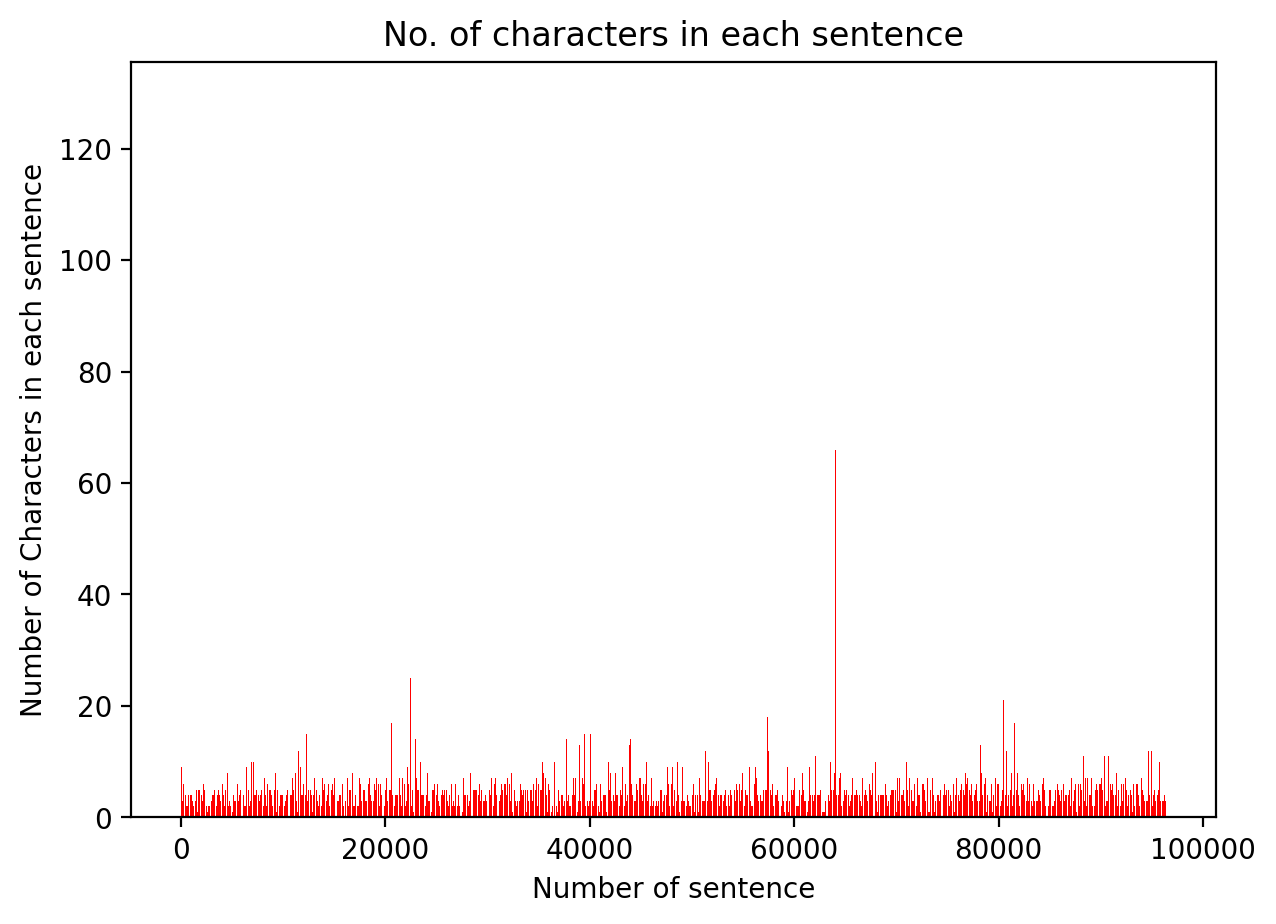

In [10]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':200})
plt.bar(range(1,96476), sentences, color = ['red'])
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence')

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese', do_lower_case=True)

In [12]:
tokenizer.tokenize('我很開心')

['我', '很', '開', '心']

In [13]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], train_texts))

len(train_tokens)

96475

In [14]:
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
train_tokens_ids.shape

(96475, 512)

In [15]:
train_y = np.array(train_labels) == 'pos'
train_y.shape,np.mean(train_y)

((96475,), 0.0)

In [16]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

/home/tekashi/anaconda3/envs/Awesome/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
baseline_model = make_pipeline(CountVectorizer(ngram_range=(1,3)), LogisticRegression()).fit(train_texts, train_labels)

/home/tekashi/anaconda3/envs/Awesome/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        _, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


/home/tekashi/anaconda3/envs/Awesome/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484808560/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


device(type='cpu')

In [21]:
bert_clf = BertBinaryClassifier()
# bert_clf = bert_clf.cuda()

In [22]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'0.0M'

In [23]:
x = torch.tensor(train_tokens_ids[:3]).to(device)
y, pooled = bert_clf.bert(x, output_all_encoded_layers=False)
x.shape, y.shape, pooled.shape

(torch.Size([3, 512]), torch.Size([3, 512, 768]), torch.Size([3, 768]))

In [24]:
y = bert_clf(x)
y.cpu().detach().numpy() 

array([[0.47550327],
       [0.54469335],
       [0.4557402 ]], dtype=float32)

In [25]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'0.0M'

In [26]:
y, x, pooled = None, None, None
torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'0.0M'

In [27]:
BATCH_SIZE = 4
EPOCHS = 10

In [29]:
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

# test_tokens_tensor = torch.tensor(test_tokens_ids)
# test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
# test_masks_tensor = torch.tensor(test_masks)

str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'0.0M'

In [30]:
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

In [31]:
param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

In [32]:
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

In [33]:
torch.cuda.empty_cache() 

In [ ]:
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()

        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()
        

        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_texts) / BATCH_SIZE, train_loss / (step_num + 1)))

Epoch:  1
72/24118.75 loss: 0.42822661056910477 
0.0M
